### More Datasets Analysis of differentially expressed secreted proteins in cell culture supernatant of hBMEC in E.coli infection (https://www.ebi.ac.uk/pride/archive/projects/PXD021427(evidence.txt)) ###

In [ ]:
#cannot find link for the paper

In [1]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import re
import numpy as np
pd.options.mode.chained_assignment = None 
import io
from io import StringIO

In [2]:
# C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteusAll.tsv
# C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteusAllA2.tsv
# C:\\Users\\ahmad\\Dropbox\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\allPeptides_Dataset_2.txt
Data=input("please load data:")
df = pd.read_csv(Data, sep="\t" ,low_memory=False) # read in the dataframe
df

please load data: C:\\Users\\ahmad\\Dropbox\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\allPeptides_Dataset_2.txt


,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Reverse,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,AIF MS/MS IDs,Oxidation (M) site IDs
0,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,Q86U42,...,NaN,NaN,0,2425,0,0,0;1,1.0,NaN,NaN
1,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,Q86U42,...,NaN,NaN,1,2425,0,0,2,2.0,NaN,NaN
2,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,Q86U42,...,NaN,NaN,2,2425,0,0,3,3.0,NaN,NaN
3,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,Q86U42,...,NaN,NaN,3,2425,0,0,4,4.0,NaN,NaN
4,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,Q86U42,...,NaN,NaN,4,2425,0,0,5,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140427,YYVTIIDAPGHR,12,Unmodified,_YYVTIIDAPGHR_,NaN,NaN,0,0,0,Q6IPT9;Q6IPS9;Q53HR5;Q53HQ7;Q53HM9;Q53G85;P681...,...,NaN,NaN,140427,2151;2326;1197,22071,22420,NaN,NaN,NaN,NaN
140428,YYVTIIDAPGHR,12,Unmodified,_YYVTIIDAPGHR_,NaN,NaN,0,0,0,Q6IPT9;Q6IPS9;Q53HR5;Q53HQ7;Q53HM9;Q53G85;P681...,...,NaN,NaN,140428,2151;2326;1197,22071,22420,NaN,NaN,NaN,NaN
140429,YYVTIIDAPGHR,12,Unmodified,_YYVTIIDAPGHR_,NaN,NaN,0,0,0,Q6IPT9;Q6IPS9;Q53HR5;Q53HQ7;Q53HM9;Q53G85;P681...,...,NaN,NaN,140429,2151;2326;1197,22071,22420,NaN,NaN,NaN,NaN
140430,YYVTIIDAPGHR,12,Unmodified,_YYVTIIDAPGHR_,NaN,NaN,0,0,0,Q6IPT9;Q6IPS9;Q53HR5;Q53HQ7;Q53HM9;Q53G85;P681...,...,NaN,NaN,140430,2151;2326;1197,22071,22420,NaN,NaN,NaN,NaN


In [3]:
df = df.drop_duplicates(subset='Sequence', keep="first") #REMOVE DUPLICATES
df

,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Reverse,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,AIF MS/MS IDs,Oxidation (M) site IDs
0,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,Q86U42,...,NaN,NaN,0,2425,0,0,0;1,1.0,NaN,NaN
11,AAAAAAGAGPEMVR,14,Acetyl (Protein N-term),_(ac)AAAAAAGAGPEMVR_,NaN,NaN,1,0,0,Q1HBJ4;P28482;Q499G7,...,NaN,NaN,11,1957,1,1,14;15,15.0,NaN,NaN
14,AAAAAAGEAR,10,Acetyl (Protein N-term),_(ac)AAAAAAGEAR_,NaN,NaN,1,0,0,A0A140VKA9;P09417;B7Z415;D6RGG7;D6RHJ7,...,NaN,NaN,14,741,2,2,18,18.0,NaN,NaN
15,AAAAAEQQQFYLLLGNLLSPDNVVR,25,Acetyl (Protein N-term),_(ac)AAAAAEQQQFYLLLGNLLSPDNVVR_,NaN,NaN,1,0,0,A0A024RDY0;O00410;B4E0R6;E7ETV3;E7EQT5;C9JZD8,...,NaN,NaN,15,450,3,3,19,19.0,NaN,NaN
21,AAAAAGTATSQR,12,Acetyl (Protein N-term),_(ac)AAAAAGTATSQR_,NaN,NaN,1,0,0,Q9Y2Z0;A8K7W3;A8K5T7,...,NaN,NaN,21,2657,4,4,24,24.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140204,YYTLEEIQK,9,Unmodified,_YYTLEEIQK_,NaN,NaN,0,0,0,Q59F44;P00167,...,NaN,NaN,140204,1801,22067,22416,127857,127857.0,NaN,NaN
140211,YYTPTISR,8,Unmodified,_YYTPTISR_,NaN,NaN,0,0,0,A0A140VJS6;P49721;B7Z478;Q59FJ0,...,NaN,NaN,140211,708,22068,22417,127864,127864.0,NaN,NaN
140217,YYTSASGDEMVSLK,14,Unmodified,_YYTSASGDEMVSLK_,NaN,NaN,0,0,0,K9JA46;P07900;Q2VPJ6;Q8TBA7;O75322;Q86U12;Q96HX7,...,NaN,NaN,140217,1681,22069,22418,127872,127872.0,NaN,NaN
140370,YYTVFDR,7,Unmodified,_YYTVFDR_,NaN,NaN,0,0,0,A0A1B0GW44;A0A1B0GV23;A0A1B0GVD5;A0A1B0GWE8;V9...,...,NaN,NaN,140370,757,22070,22419,127974,127974.0,NaN,NaN


In [4]:
all_protein= []   #list of protein names
for proteins in df['Gene names']:
    all_protein.append(proteins)

In [5]:
#remove nan
all_protein = [x for x in all_protein if not isinstance(x, float) or not math.isnan(x)]
# Split elements with protein IDs separated by semicolon (;)
all_protein = [item for sublist in [x.split(';') if ';' in x else [x] for x in all_protein] for item in sublist]


In [6]:
protein_names = [] #list of all unique protein names
for p in all_protein:
    if p not in protein_names:
        protein_names.append(p)

In [7]:
len(all_protein)

30708

In [8]:
len(protein_names)

3885

In [9]:
with open('protein_names.txt', 'w') as f: #write protein names to file
    for proteins in protein_names: #for each protein in the list
        #for protein in proteins: #for each protein in the list
            f.write("%s\n" % proteins) #write each protein to file

In [10]:
df= df.filter(['Sequence', 'Gene names', 'Modifications']) #filter dataframe to only include protein names and sequences
df

,Sequence,Gene names,Modifications
0,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term)
11,AAAAAAGAGPEMVR,MAPK1,Acetyl (Protein N-term)
14,AAAAAAGEAR,QDPR,Acetyl (Protein N-term)
15,AAAAAEQQQFYLLLGNLLSPDNVVR,RANBP5;IPO5,Acetyl (Protein N-term)
21,AAAAAGTATSQR,SUGT1,Acetyl (Protein N-term)
...,...,...,...
140204,YYTLEEIQK,CYB5A,Unmodified
140211,YYTPTISR,PSMB2,Unmodified
140217,YYTSASGDEMVSLK,EL52;HSP90AA1,Unmodified
140370,YYTVFDR,HEL-S-130P;CTSD,Unmodified


In [11]:
# C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID.tsv
#C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID_A2.tsv
#C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID Daraset 2.tsv
# C:\\Users\\ahmad\\Dropbox\\PC\\Downloads\\uniprot-compressed_true_download_true_fields_accession_format_tsv-2023.06.18-14.57.31.07.tsv\\uniprot-compressed_true_download_true_fields_accession_format_tsv-2023.06.18-14.57.31.07.tsv
IDs=input("please load IDs:")
proteinID = pd.read_csv(IDs, sep="\t") #read in protein ID file
proteinID=proteinID.rename(columns={'From': 'ProteinID'})
proteinID

please load IDs: C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID Daraset 2.tsv


,ProteinID,Entry
0,PABPN1,Q86U42
1,MAPK1,P28482
2,QDPR,P09417
3,RANBP5,O00410
4,IPO5,O00410
...,...,...
409,ZC3HAV1,Q7Z2W4
410,LGALS3BP,Q08380
411,C4B,P0C0L5
412,C4A,P0C0L4


In [12]:
proteinID = proteinID.drop_duplicates(subset='ProteinID', keep="first")
proteinID.to_csv('ID_Dataset 2.tsv', sep="\t", index=False)
proteinID

,ProteinID,Entry
0,PABPN1,Q86U42
1,MAPK1,P28482
2,QDPR,P09417
3,RANBP5,O00410
4,IPO5,O00410
...,...,...
409,ZC3HAV1,Q7Z2W4
410,LGALS3BP,Q08380
411,C4B,P0C0L5
412,C4A,P0C0L4


In [13]:
df = df.merge(proteinID, left_on='Gene names', right_on='ProteinID', how='left') #merge protein names with protein ID
df

,Sequence,Gene names,Modifications,ProteinID,Entry
0,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),PABPN1,Q86U42
1,AAAAAAGAGPEMVR,MAPK1,Acetyl (Protein N-term),MAPK1,P28482
2,AAAAAAGEAR,QDPR,Acetyl (Protein N-term),QDPR,P09417
3,AAAAAEQQQFYLLLGNLLSPDNVVR,RANBP5;IPO5,Acetyl (Protein N-term),NaN,NaN
4,AAAAAGTATSQR,SUGT1,Acetyl (Protein N-term),SUGT1,Q9Y2Z0
...,...,...,...,...,...
22067,YYTLEEIQK,CYB5A,Unmodified,NaN,NaN
22068,YYTPTISR,PSMB2,Unmodified,NaN,NaN
22069,YYTSASGDEMVSLK,EL52;HSP90AA1,Unmodified,NaN,NaN
22070,YYTVFDR,HEL-S-130P;CTSD,Unmodified,NaN,NaN


In [14]:
df.to_csv('merged_proteins_Dataset2.tsv', sep="\t", index=False) #write merged dataframe to file

In [15]:
df= df.filter(['Sequence', 'Proteins', 'Modifications' , 'Entry']) #remove columns that are not needed
df= df[df['Entry'].notnull()] #remove rows with null values
df

,Sequence,Modifications,Entry
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417
4,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0
5,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258
...,...,...,...
21991,YTQVGPDHNR,Unmodified,Q08211
22020,YVLINWVGEDVPDAR,Unmodified,Q16643
22033,YWCNDGK,Unmodified,P61626
22054,YYGAQTVR,Unmodified,P07954


In [16]:
#C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\Protein_seq_A2.fasta
# C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\protein_seq.fasta
#  C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\proteinseq_Dataset 2.fasta
protein_seq=input("please load protein_seq:")


with open(protein_seq) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq.append(seq_record.seq)

please load protein_seq: C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\proteinseq_Dataset 2.fasta


In [18]:
new_df = pd.DataFrame({'Identifier': identifiers, 'Protein_Sequence': seq}) #create new dataframe with identifiers and sequences

proteinID = r'sp\|(.*)\|.*' #regular expression to extract protein ID
new_df['Identifier'] = [re.sub(proteinID, r'\1', x) for x in new_df['Identifier']] #remove protein ID from identifier

def list_to_string(list):   #convert list to string
    return ','.join(list)   #join list with ','
new_df['Protein_Sequence'] = new_df['Protein_Sequence'].apply(list_to_string) #convert list to string

#df['col'].apply(', '.join)

new_df['Protein_Sequence'] = new_df['Protein_Sequence'].str.replace(',', '') #remove ',' from string
new_df

,Identifier,Protein_Sequence
0,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...
2,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...
3,O00410,MAAAAAEQQQFYLLLGNLLSPDNVVRKQAEETYENIPGQSKITFLL...
4,O00410,MAAAAAEQQQFYLLLGNLLSPDNVVRKQAEETYENIPGQSKITFLL...
...,...,...
409,Q7Z2W4,MADPEVCCFITKILCAHGGRMALDALLQEIALSEPQLCEVLQVAGP...
410,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...
411,P0C0L5,MRLLWGLIWASSFFTLSLQKPRLLLFSPSVVHLGVPLSVGVQLQDV...
412,P0C0L4,MRLLWGLIWASSFFTLSLQKPRLLLFSPSVVHLGVPLSVGVQLQDV...


In [19]:
new_df.to_csv('check_seq_Dataset2.tsv', sep="\t", index=False) 

In [20]:
#df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID


df= df.merge(new_df, left_on='Entry', right_on='Identifier', how='left') #merge protein names with protein ID
df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...
...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...


In [21]:
def check_Sequence_in_Protein_Sequence(row): #function to check if sequence is in full sequence
    if row['Sequence'] in row['Protein_Sequence']:
        return True
    else:
        return False

In [22]:
df['Check'] = df.apply(check_Sequence_in_Protein_Sequence, axis=1) #apply function to dataframe
df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True
...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True


In [23]:
df['Check'].value_counts() #count number of trues and falses

True     875
False     37
Name: Check, dtype: int64

In [24]:
df = df[df.Check != False] #remove rows that are false

df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True
...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True


In [25]:
def peptide_start_position(protein, peptide): #This function finds the start position of the peptide in the protein sequence   
    for p in peptide:
        start_position= protein.find(peptide) #find start position of peptide in protein sequence  
        return start_position+1 #return start position of peptide in protein sequence

def peptide_end_position(protein, peptide): #This function finds the end position of the peptide in the protein sequence
    for p in peptide: 
        start_position= protein.find(peptide) #find start position of peptide in protein sequence
        end_position= start_position+len(peptide)-1 #find end position of peptide in protein sequence
        return end_position+1 #return end position of peptide

def find_peptide(protein, peptide): #This function finds the next AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[next_position]   #return next AA of peptide
        
    except:
        return ''

def find_last_AA(protein, peptide): #This function finds the last AA of the peptide in the protein sequence
    
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence

        return protein[last_position_amino_acid] #return last AA of peptide
    except:
        return ''

def next_2_AA(protein, peptide): #This function finds the next 2 AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[last_position_amino_acid:next_position+1] #return next 5 AA of peptide
    except:
        return ''    


In [26]:
df['start']= df.apply(lambda row: peptide_start_position(row['Protein_Sequence'], row['Sequence']), axis=1) #apply function to dataframe
df['end']= df.apply(lambda row: peptide_end_position(row['Protein_Sequence'], row['Sequence']), axis=1) 
df['last_AA']= df.apply(lambda row: find_last_AA(row['Protein_Sequence'], row['Sequence']), axis=1)
df['next_AA']= df.apply(lambda row: find_peptide(row['Protein_Sequence'], row['Sequence']), axis=1)
df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,2,15,R,G
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True,2,11,R,R
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,2,13,R,F
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True,6,22,R,A
...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True,200,209,R,S
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True,80,94,R,K
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True,81,87,K,T
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True,67,74,R,S


In [27]:
df = df[df.Protein_Sequence != ''] #remove rows with empty protein sequences

In [28]:
p_count= (df['next_AA'] == 'P').sum() #count number of P's
p_count

9

In [29]:
reg= r".*[RK]P.*" #regular expression to find R|K P
df_RK= df[df.Sequence.str.match(reg)] #filter dataframe to only include peptides with R|K P
df_RK

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
12,AAAEEEPKPK,Acetyl (Protein N-term),P55263,P55263,MAAAEEEPKPKKLKVEAPQALRENILFGMGNPLLDISAVVDKDFLD...,True,2,11,K,K
40,AADLQLEMTQKPHK,Unmodified,O15382,O15382,MAAAALGQIWARKLLSVPWLLCGPRRYASSSFKAADLQLEMTQKPH...,True,34,47,K,K
77,ALEQKPDDAQYYCQR,Unmodified,Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,37,51,R,A
91,AQGPAASAEEPKPVEAPAANSDQTVTVK,Unmodified,P80723,P80723,MGGKLSKKKKGYNVNDEKAKEKDKKAEGAATEEEGTPKESEPQAAA...,True,199,226,K,E
92,AQGPAASAEEPKPVEAPAANSDQTVTVKE,Unmodified,P80723,P80723,MGGKLSKKKKGYNVNDEKAKEKDKKAEGAATEEEGTPKESEPQAAA...,True,199,227,E,
101,AVAVGRPSNEELR,Acetyl (Protein N-term),Q9NVA2,Q9NVA2,MAVAVGRPSNEELRNLSLSGHVGFDSLPDQLVNKSTSQGFCFNILC...,True,2,14,R,N
116,DALRPPLQNINSVQLK,Unmodified,Q14008,Q14008,MGDDSEWLKLPVDQKCEHKLWKARLSGYEEALKIFQKIKDEKSPEW...,True,197,212,K,E
128,DLKPSNLLLNTTCDLK,Unmodified,P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,149,164,K,I
166,EKPDQDAEGKAEEK,Unmodified,P80723,P80723,MGGKLSKKKKGYNVNDEKAKEKDKKAEGAATEEEGTPKESEPQAAA...,True,56,69,K,E
167,EKPGVESMR,Unmodified,Q9Y2A7,Q9Y2A7,MSRSVLQPSQQKLAEKLTILNDRGVGMLTRLYNIKKACGDPKAKPS...,True,658,666,R,K


In [30]:
df_RK['next_AA'].value_counts() 

E    7
A    5
K    4
Q    4
L    4
     3
R    3
F    3
D    3
T    3
G    2
V    2
N    2
I    1
Y    1
P    1
H    1
Name: next_AA, dtype: int64

In [31]:
df['extended_peptide']= df.apply(lambda row: next_2_AA(row['Protein_Sequence'], row['Sequence']), axis=1) #add last AA of peptide and next AA
df_p= df.loc[lambda x: x['extended_peptide'].str.contains(reg , regex=True)] #find rows that contain R|K P

In [32]:
df_p.loc[df_p['last_AA'] == 'Q'] #find rows where last AA is Q, just to check dataframe

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide


In [33]:
total= len(df_RK) #Sum of rows with R|K P pattern in peptide sequence 
print(total)
print(p_count)

49
9


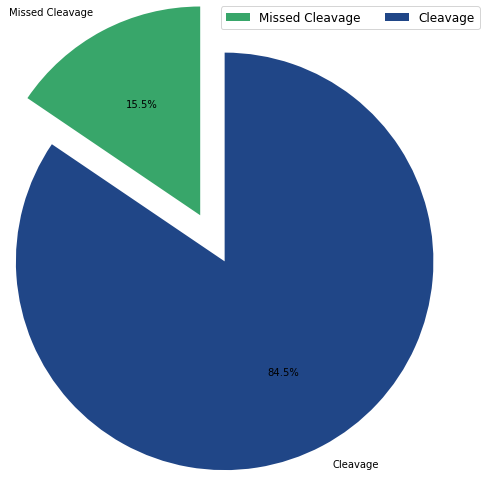

In [34]:
y_axis= np.array([p_count, total]) #create array of y axis values
mycolors = ["#38a66a","#204687"] #create array of colors
plt.figure(figsize=(8, 8)) #set figure size
plt.pie(y_axis, labels=["Missed Cleavage", "Cleavage"], autopct='%1.1f%%' , colors=mycolors, startangle=90, explode=[0.3, 0], radius=1.2,) #plot pie chart
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12, ncol=2) #set legend      
plt.show() #show plot

In [35]:
df['cleavage_sites'] = df['Sequence'].str.findall(r".(?:(?<![KR](?!P)).)*") #find all cleavage sites in peptide sequence
df['cleavage_sites'] = [','.join(map(str, l)) for l in df['cleavage_sites']] #convert list to string
df['missed'] = df.cleavage_sites.str.count(',') #count number of missed cleavage sites
df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,2,15,R,G,RG,AAAAAAGAGPEMVR,0
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True,2,11,R,R,RR,AAAAAAGEAR,0
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,2,13,R,F,RF,AAAAAGTATSQR,0
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True,6,22,R,A,RA,AAAAAWEEPSSGNGTAR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True,200,209,R,S,RS,YTQVGPDHNR,0
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True,80,94,R,K,RK,YVLINWVGEDVPDAR,0
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True,81,87,K,T,KT,YWCNDGK,0
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True,67,74,R,S,RS,YYGAQTVR,0


In [36]:
cleavage= r".*?([RK]),.*"
second_cleavage= r".*[RK],.*([RK]),.*"
df['MS_AA']= df.cleavage_sites.str.findall(cleavage)
df['MS_AA']= df['MS_AA'].apply(list_to_string)
df['2nd_cleavage']= df.cleavage_sites.str.findall(second_cleavage)
df['2nd_cleavage']= df['2nd_cleavage'].apply(list_to_string)
df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0,,
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,2,15,R,G,RG,AAAAAAGAGPEMVR,0,,
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True,2,11,R,R,RR,AAAAAAGEAR,0,,
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,2,13,R,F,RF,AAAAAGTATSQR,0,,
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True,6,22,R,A,RA,AAAAAWEEPSSGNGTAR,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True,200,209,R,S,RS,YTQVGPDHNR,0,,
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True,80,94,R,K,RK,YVLINWVGEDVPDAR,0,,
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True,81,87,K,T,KT,YWCNDGK,0,,
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True,67,74,R,S,RS,YYGAQTVR,0,,


In [37]:
missed_cleavage= r".*?([RK]),.*"

In [38]:
def split_cleavage_sites(row):  #function to split  cleavage sites
    if row == 'nan':
        return row
    else:
        return row.split(',')

def second_split(cs_split): #function to seperate 2nd cleavage site
    if len(cs_split) >2:
        return cs_split[1]
    else:
        return ''

In [39]:
df['cs_split'] = df['cleavage_sites'].apply(split_cleavage_sites) #split cleavage sites
df['first_half']= df['cs_split'].apply(lambda x: x[0]) # first half of cleavage sites
df['second_half']= df['cs_split'].apply(second_split) #second half of cleavage sites
df


,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0,,,[AAAAAAAAAAGAAGGR],AAAAAAAAAAGAAGGR,
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,2,15,R,G,RG,AAAAAAGAGPEMVR,0,,,[AAAAAAGAGPEMVR],AAAAAAGAGPEMVR,
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True,2,11,R,R,RR,AAAAAAGEAR,0,,,[AAAAAAGEAR],AAAAAAGEAR,
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,2,13,R,F,RF,AAAAAGTATSQR,0,,,[AAAAAGTATSQR],AAAAAGTATSQR,
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True,6,22,R,A,RA,AAAAAWEEPSSGNGTAR,0,,,[AAAAAWEEPSSGNGTAR],AAAAAWEEPSSGNGTAR,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True,200,209,R,S,RS,YTQVGPDHNR,0,,,[YTQVGPDHNR],YTQVGPDHNR,
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True,80,94,R,K,RK,YVLINWVGEDVPDAR,0,,,[YVLINWVGEDVPDAR],YVLINWVGEDVPDAR,
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True,81,87,K,T,KT,YWCNDGK,0,,,[YWCNDGK],YWCNDGK,
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True,67,74,R,S,RS,YYGAQTVR,0,,,[YYGAQTVR],YYGAQTVR,


In [40]:
def cs_split(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)-1
        


def split_second(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)

In [41]:
df['position_MS']= df.apply(lambda row: cs_split(row['first_half'], row['start'], row['MS_AA']), axis=1)
df['2nd_MS'] = df.apply(lambda row: split_second(row['second_half'], row['position_MS'], row['2nd_cleavage']), axis=1)
df

,Sequence,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0,,,[AAAAAAAAAAGAAGGR],AAAAAAAAAAGAAGGR,,0,0
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,2,15,R,G,RG,AAAAAAGAGPEMVR,0,,,[AAAAAAGAGPEMVR],AAAAAAGAGPEMVR,,0,0
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True,2,11,R,R,RR,AAAAAAGEAR,0,,,[AAAAAAGEAR],AAAAAAGEAR,,0,0
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,2,13,R,F,RF,AAAAAGTATSQR,0,,,[AAAAAGTATSQR],AAAAAGTATSQR,,0,0
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True,6,22,R,A,RA,AAAAAWEEPSSGNGTAR,0,,,[AAAAAWEEPSSGNGTAR],AAAAAWEEPSSGNGTAR,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True,200,209,R,S,RS,YTQVGPDHNR,0,,,[YTQVGPDHNR],YTQVGPDHNR,,0,0
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True,80,94,R,K,RK,YVLINWVGEDVPDAR,0,,,[YVLINWVGEDVPDAR],YVLINWVGEDVPDAR,,0,0
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True,81,87,K,T,KT,YWCNDGK,0,,,[YWCNDGK],YWCNDGK,,0,0
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True,67,74,R,S,RS,YYGAQTVR,0,,,[YYGAQTVR],YYGAQTVR,,0,0


In [42]:
#test_df= test_df.rename({'position_MS':'dssp index'}, axis=1)
df= df.rename({'Entry':'ProteinID'}, axis=1)
df

,Sequence,Modifications,ProteinID,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAAAAGAAGGR,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0,,,[AAAAAAAAAAGAAGGR],AAAAAAAAAAGAAGGR,,0,0
1,AAAAAAGAGPEMVR,Acetyl (Protein N-term),P28482,P28482,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,True,2,15,R,G,RG,AAAAAAGAGPEMVR,0,,,[AAAAAAGAGPEMVR],AAAAAAGAGPEMVR,,0,0
2,AAAAAAGEAR,Acetyl (Protein N-term),P09417,P09417,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,True,2,11,R,R,RR,AAAAAAGEAR,0,,,[AAAAAAGEAR],AAAAAAGEAR,,0,0
3,AAAAAGTATSQR,Acetyl (Protein N-term),Q9Y2Z0,Q9Y2Z0,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,True,2,13,R,F,RF,AAAAAGTATSQR,0,,,[AAAAAGTATSQR],AAAAAGTATSQR,,0,0
4,AAAAAWEEPSSGNGTAR,Unmodified,Q9P258,Q9P258,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,True,6,22,R,A,RA,AAAAAWEEPSSGNGTAR,0,,,[AAAAAWEEPSSGNGTAR],AAAAAWEEPSSGNGTAR,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Unmodified,Q08211,Q08211,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,True,200,209,R,S,RS,YTQVGPDHNR,0,,,[YTQVGPDHNR],YTQVGPDHNR,,0,0
908,YVLINWVGEDVPDAR,Unmodified,Q16643,Q16643,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,True,80,94,R,K,RK,YVLINWVGEDVPDAR,0,,,[YVLINWVGEDVPDAR],YVLINWVGEDVPDAR,,0,0
909,YWCNDGK,Unmodified,P61626,P61626,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,True,81,87,K,T,KT,YWCNDGK,0,,,[YWCNDGK],YWCNDGK,,0,0
910,YYGAQTVR,Unmodified,P07954,P07954,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,True,67,74,R,S,RS,YYGAQTVR,0,,,[YYGAQTVR],YYGAQTVR,,0,0


In [43]:
df.to_csv('newDF_Dataset2.csv', index = False, header=True) #write to csv file

In [44]:
#df= df.filter(['Sequence', 'Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'missed', 'MS_AA', '2nd_cleavage'  ,'position_MS', '2nd_MS'], axis=1)

In [45]:
df.to_csv('MS_df_Dataset2.csv', index = False, header=True) #write to csv file

In [46]:
df_model= df.filter(['Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'MS_AA','position_MS','next_AA'], axis=1)
df_model

,Protein_Sequence,ProteinID,start,end,cleavage_sites,MS_AA,position_MS,next_AA
0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,Q86U42,2,17,AAAAAAAAAAGAAGGR,,0,G
1,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,P28482,2,15,AAAAAAGAGPEMVR,,0,G
2,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,P09417,2,11,AAAAAAGEAR,,0,R
3,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,Q9Y2Z0,2,13,AAAAAGTATSQR,,0,F
4,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,Q9P258,6,22,AAAAAWEEPSSGNGTAR,,0,A
...,...,...,...,...,...,...,...,...
907,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,Q08211,200,209,YTQVGPDHNR,,0,S
908,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,Q16643,80,94,YVLINWVGEDVPDAR,,0,K
909,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,P61626,81,87,YWCNDGK,,0,T
910,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,P07954,67,74,YYGAQTVR,,0,S


In [47]:
df_model= df_model.rename({'position_MS':'MC_position', 'MS_AA':'Missed_Cleavage_AA'}, axis=1)
df_model.to_csv('MS_model.csv', index = False, header=True) #write to csv file
df_model

,Protein_Sequence,ProteinID,start,end,cleavage_sites,Missed_Cleavage_AA,MC_position,next_AA
0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,Q86U42,2,17,AAAAAAAAAAGAAGGR,,0,G
1,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,P28482,2,15,AAAAAAGAGPEMVR,,0,G
2,MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENE...,P09417,2,11,AAAAAAGEAR,,0,R
3,MAAAAAGTATSQRFFQSFSDALIDEDPQAALEELTKALEQKPDDAQ...,Q9Y2Z0,2,13,AAAAAGTATSQR,,0,F
4,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...,Q9P258,6,22,AAAAAWEEPSSGNGTAR,,0,A
...,...,...,...,...,...,...,...,...
907,MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYT...,Q08211,200,209,YTQVGPDHNR,,0,S
908,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,Q16643,80,94,YVLINWVGEDVPDAR,,0,K
909,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,P61626,81,87,YWCNDGK,,0,T
910,MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMAS...,P07954,67,74,YYGAQTVR,,0,S


In [48]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','MS_AA','position_MS', 'missed'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,,0,0
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,,0,0
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,,0,0
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,,0,0
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,,0,0
...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,,0,0
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,,0,0
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,,0,0
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,,0,0


In [49]:
df.cleavage_sites = df.cleavage_sites.str.split(',')                                                                
df= df.explode('cleavage_sites')

In [50]:
def fill_empty_MS_AA(row):
    if row['MS_AA'] == '':
        last_amino_acid = row['Sequence'][-1]
        return last_amino_acid
    else:
        return row['MS_AA']

In [51]:
df['MS_AA'] = df.apply(lambda row: fill_empty_MS_AA(row), axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,0,0
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,0,0
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,0,0
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,0,0
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,0,0
...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,0,0
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,0,0
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,0,0
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,0,0


In [52]:
df = df[df.missed != 2]
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,0,0
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,0,0
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,0,0
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,0,0
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,0,0
...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,0,0
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,0,0
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,0,0
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,0,0


In [53]:
df['ProteinID_s'] = df['ProteinID'].shift(1)
df['start_s'] = df['start'].shift(1)
df['end_s'] = df['end'].shift(1)

In [54]:
df['duplicate'] = (df['ProteinID'] == df['ProteinID_s']) & (df['start'] == df['start_s']) & (df['end'] == df['end_s'])

In [55]:
def change_values(row): #function to change values
    if row['duplicate'] == True:
        row['missed'] = 0
        row['MS_AA'] = row['Sequence'][-1]
        row['position_MS'] = row['end']
        return row
    else:
        return row
        
def fill_empty_position_MS(row): #function to fill empty position_MS
    if row['position_MS'] == 0:
        row['position_MS'] = row['end']
        return row
    else:
        return row 

In [56]:
df = df.apply(lambda row: change_values(row), axis=1) #apply function to change values
df = df.apply(lambda row: fill_empty_position_MS(row), axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed,ProteinID_s,start_s,end_s,duplicate
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,NaN,NaN,NaN,False
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0,Q86U42,2.0,17.0,False
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0,P28482,2.0,15.0,False
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0,P09417,2.0,11.0,False
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0,Q9Y2Z0,2.0,13.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0,Q9BWJ5,5.0,17.0,False
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0,Q08211,200.0,209.0,False
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0,Q16643,80.0,94.0,False
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0,P61626,81.0,87.0,False


In [57]:
df= df.rename({'MS_AA':'Last_AA', 'missed':'Cleavage', 'position_MS':'LastAA_position' }, axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,ProteinID_s,start_s,end_s,duplicate
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,NaN,NaN,NaN,False
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0,Q86U42,2.0,17.0,False
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0,P28482,2.0,15.0,False
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0,P09417,2.0,11.0,False
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0,Q9Y2Z0,2.0,13.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0,Q9BWJ5,5.0,17.0,False
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0,Q08211,200.0,209.0,False
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0,Q16643,80.0,94.0,False
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0,P61626,81.0,87.0,False


In [58]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','Last_AA','LastAA_position', 'Cleavage'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0
...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0


In [59]:
df.to_csv('MS_df_Dataset2.csv', index = False, header=True) #write to csv file

In [60]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0
...,...,...,...,...,...,...,...,...,...
907,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0
908,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0
909,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0
910,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0


In [61]:
protein_name=input("input protein name:")

result = df.loc[df["ProteinID"] == protein_name]


if protein_name=='None':
     print(df)
else:
    print (result)

input protein name: None


              Sequence ProteinID            Modifications  start  end  \
0     AAAAAAAAAAGAAGGR    Q86U42  Acetyl (Protein N-term)      2   17   
1       AAAAAAGAGPEMVR    P28482  Acetyl (Protein N-term)      2   15   
2           AAAAAAGEAR    P09417  Acetyl (Protein N-term)      2   11   
3         AAAAAGTATSQR    Q9Y2Z0  Acetyl (Protein N-term)      2   13   
4    AAAAAWEEPSSGNGTAR    Q9P258               Unmodified      6   22   
..                 ...       ...                      ...    ...  ...   
907         YTQVGPDHNR    Q08211               Unmodified    200  209   
908    YVLINWVGEDVPDAR    Q16643               Unmodified     80   94   
909            YWCNDGK    P61626               Unmodified     81   87   
910           YYGAQTVR    P07954               Unmodified     67   74   
911   YYSVNVPIQDGIQDEK    Q9BY41               Unmodified    224  239   

        cleavage_sites Last_AA  LastAA_position  Cleavage  
0     AAAAAAAAAAGAAGGR       R               17         0  
1  

### Feature calculation ###

In [62]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns 
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import os
import re
import gzip
import shutil
import glob
import numpy as np
import scipy.stats as stats
import pylab as pl
import csv
from Bio.PDB.SASA import ShrakeRupley


In [63]:
import Peptide_Analysis as PA# has to be in the same directory

In [64]:
df = pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\MS_df_Dataset2.csv")   # read in the dataframe
df.fillna('', inplace=True)   # replace NaN with empty string

In [65]:
def dssp_file_df(file): # function to read in the dssp file and return a dataframe
    p = PDBParser() # create a PDB parser
    structure = p.get_structure(f"{file}", file) # get the structure from the PDB file
    model = structure[0]#  get the first model from the structure
    dssp = DSSP(model, file) # get the DSSP from the model
    df= pd.DataFrame(dssp)# create a dataframe from the DSSP
    df.columns = ["dssp index", "amino acid", "secondary structure", "relative ASA", "phi", "psi", "NH01R", "NH01E", "ONH1", "ONHE", "NH2R",
    "NO2E", "ONH2R", "ONH2E"] # naming the columns
    return df # return the dataframe

In [66]:
# def dssp_dataframe_calculation(df):
#     df.fillna('', inplace=True)# Replace all NaN values in the DataFrame with empty strings
#     output_rows = [] # Create an empty list to store the output rows
#     # Define the path to the proteome directory
#     proteome_path = 'C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome' 
    
#     # Iterate over each row of the input DataFrame
#     for i, j in df.iterrows():
#         # Generate the file path for the DSSP file for the current protein
#         filename = f'AF-{j["ProteinID"]}-F1-model_v4.pdb'
#         filepath = os.path.join(proteome_path, filename, filename)
        
#         # Check if the DSSP file exists
#         if os.path.exists(filepath):
#             # If it does, read the DSSP file into a DataFrame
#             df_dssp = dssp_file_df(filepath)
#             # Find the row in the DSSP DataFrame that corresponds to the last amino acid in the protein sequence
#             dssp_row = df_dssp[df_dssp['dssp index'] == j['LastAA_position']]
#             # If a matching row was found, append the values to the output rows list
#             if not dssp_row.empty:
#                 output_rows.append([
#                     dssp_row['relative ASA'].values[0],
#                     dssp_row['secondary structure'].values[0],
#                     dssp_row['phi'].values[0],
#                     dssp_row['psi'].values[0],
#                     dssp_row['NH01R'].values[0],
#                     dssp_row['NH01E'].values[0],
#                     dssp_row['ONH1'].values[0],
#                     dssp_row['ONHE'].values[0],
#                     dssp_row['NH2R'].values[0],
#                     dssp_row['NO2E'].values[0],
#                     dssp_row['ONH2R'].values[0],
#                     dssp_row['ONH2E'].values[0],
#                 ])
#             else: # If no matching row was found, append 12 empty strings to the output rows list
#                 output_rows.append(('' for _ in range(12)))
#         else:# If the DSSP file does not exist, append 12 empty strings to the output rows list
#             output_rows.append(('' for _ in range(12)))
#     # Write the output rows list to a CSV file named 'output.csv'
#     print(len(output_rows))
#     with open('output2.csv', 'w', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow(['relative ASA', 'secondary_structure', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E'])
#         writer.writerows(output_rows)
#     # Read the 'output.csv' file into a DataFrame
#     dataframe = pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\output2.csv")
#     df = df.join(dataframe)# Join the input DataFrame with the output DataFrame 
#     df['relative ASA'].replace('', np.nan, inplace=True) 
#     df.dropna(subset=['relative ASA'], inplace=True)
#     return df

In [67]:
# dssp_dataframe_calculation(df)

In [68]:
def dssp_df_calcualtion(df): # function to calculate the secondary structure and relative ASA
    relative_asa = [] # create a list to store the relative ASA
    secondary_structure = []    # create a list to store the secondary structure
    phi = []    # create a list to store the phi
    psi = []    # create a list to store the psi
    NH01R = []  # create a list to store the NH01R
    NH01E = []  # create a list to store the NH01E
    ONH1 = []   # create a list to store the ONH1
    ONHE = []   # create a list to store the ONHE
    NH2R = []   # create a list to store the NH2R
    NO2E = []   # create a list to store the NO2E
    ONH2R = []  # create a list to store the ONH2R
    ONH2E = []  # create a list to store the ONH2E



    for i,j in df.iterrows():   # loop through the dataframe
        filename= f'AF-{j["ProteinID"]}-F1-model_v4.pdb' # create the filename
        if filename in os.listdir("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome"):   # if the filename is in the human proteome folder
            print(filename)

            df_dssp= dssp_file_df(f'C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome\\{filename}\\{filename}') # read in the dssp file
            if j['LastAA_position'] in df_dssp['dssp index']: # if the last AA position is in the dssp file
                relative_asa.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['relative ASA'].values[0]) # append the relative ASA
                secondary_structure.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['secondary structure'].values[0]) # append the secondary structure
                phi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['phi'].values[0]) # append the phi
                psi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['psi'].values[0]) # append the psi
                NH01R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01R'].values[0]) # append the NH01R
                NH01E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01E'].values[0]) # append the NH01E
                ONH1.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH1'].values[0])   # append the ONH1
                ONHE.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONHE'].values[0])   # append the ONHE
                NH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH2R'].values[0])   # append the NH2R
                NO2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NO2E'].values[0])   # append the NO2E
                ONH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2R'].values[0]) # append the ONH2R
                ONH2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2E'].values[0]) # append the ONH2E


            else: # if the last AA position is not in the dssp file
                relative_asa.append('') # append empty string
                secondary_structure.append('')
                phi.append('')
                psi.append('')
                NH01R.append('')
                NH01E.append('')
                ONH1.append('')
                ONHE.append('')
                NH2R.append('')
                NO2E.append('')
                ONH2R.append('')
                ONH2E.append('')
        else:   # if the filename is not in the human proteome folder
            relative_asa.append('') # append empty string
            secondary_structure.append('')  
            phi.append('')
            psi.append('')
            NH01R.append('')
            NH01E.append('')
            ONH1.append('')
            ONHE.append('')
            NH2R.append('')
            NO2E.append('')
            ONH2R.append('')
            ONH2E.append('')


    df['secondary_structure'] = secondary_structure # add the secondary structure to the dataframe
    df['relative ASA'] = relative_asa
    df['phi'] = phi
    df['psi'] = psi
    df['NH01R'] = NH01R
    df['NH01E'] = NH01E
    df['ONH1'] = ONH1
    df['ONHE'] = ONHE
    df['NH2R'] = NH2R
    df['NO2E'] = NO2E
    df['ONH2R'] = ONH2R
    df['ONH2E'] = ONH2E
    return df.to_csv('df_dssp_Dataset2.csv', index=False)   # return the dataframe to a csv file

In [69]:
dssp_df_calcualtion(df)

AF-Q86U42-F1-model_v4.pdb
AF-P28482-F1-model_v4.pdb
AF-P09417-F1-model_v4.pdb
AF-Q9Y2Z0-F1-model_v4.pdb
AF-Q9P258-F1-model_v4.pdb
AF-P55036-F1-model_v4.pdb
AF-O00231-F1-model_v4.pdb
AF-P30153-F1-model_v4.pdb
AF-Q9UNF1-F1-model_v4.pdb
AF-A6NDG6-F1-model_v4.pdb
AF-Q9NQP4-F1-model_v4.pdb
AF-P55263-F1-model_v4.pdb
AF-Q96P70-F1-model_v4.pdb
AF-P07954-F1-model_v4.pdb
AF-P35221-F1-model_v4.pdb
AF-Q96C19-F1-model_v4.pdb
AF-Q14008-F1-model_v4.pdb
AF-P62877-F1-model_v4.pdb
AF-P26641-F1-model_v4.pdb
AF-Q16643-F1-model_v4.pdb
AF-Q9NVA2-F1-model_v4.pdb
AF-Q5VWZ2-F1-model_v4.pdb
AF-Q99733-F1-model_v4.pdb
AF-P12955-F1-model_v4.pdb
AF-P49006-F1-model_v4.pdb
AF-Q00688-F1-model_v4.pdb
AF-P55060-F1-model_v4.pdb
AF-Q9UNF0-F1-model_v4.pdb
AF-Q9UBQ7-F1-model_v4.pdb
AF-P55060-F1-model_v4.pdb
AF-P07954-F1-model_v4.pdb
AF-Q6P1J9-F1-model_v4.pdb
AF-P51452-F1-model_v4.pdb
AF-O43583-F1-model_v4.pdb
AF-O95782-F1-model_v4.pdb
AF-O15382-F1-model_v4.pdb
AF-P67809-F1-model_v4.pdb
AF-P80723-F1-model_v4.pdb
AF-P80723-F1

In [70]:
df=pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\df_dssp_Dataset2.csv")
#df = df.join(dataframe)# Join the input DataFrame with the output DataFrame 
df['relative ASA'].replace('', np.nan, inplace=True)
df.dropna(subset=['relative ASA'], inplace=True)


In [71]:
ss= pd.get_dummies(df.secondary_structure)
df= pd.concat([df, ss], axis=1)

In [72]:
mod= pd.get_dummies(df.Modifications)
df= pd.concat([df, mod], axis=1)

In [73]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,B,E,G,H,S,T,Acetyl (Protein N-term),"Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,-,...,0,0,0,0,0,0,1,0,0,0
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0,T,...,0,0,0,0,0,1,1,0,0,0
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0,-,...,0,0,0,0,0,0,1,0,0,0
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0,-,...,0,0,0,0,0,0,1,0,0,0
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0,-,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0,-,...,0,0,0,0,0,0,0,0,0,1
937,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0,H,...,0,0,0,1,0,0,0,0,0,1
938,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0,-,...,0,0,0,0,0,0,0,0,0,1
939,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0,H,...,0,0,0,1,0,0,0,0,0,1


In [74]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
df_miss_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,B,E,G,H,S,T,Acetyl (Protein N-term),"Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
37,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,-,...,0,0,0,0,0,0,0,0,0,1
43,AAEEEDEADPKR,P20962,Unmodified,82,93,AAEEEDEADPK,K,92,1,G,...,0,0,1,0,0,0,0,0,0,1
45,AAEEPSKVEEK,P29966,Unmodified,257,267,AAEEPSK,K,263,1,-,...,0,0,0,0,0,0,0,0,0,1
57,AELRDDPIISTHLAK,O00231,Unmodified,311,325,AELR,R,314,1,H,...,0,0,0,1,0,0,0,0,0,1
60,AEPEKTEGAAEAK,P80723,Unmodified,85,97,AEPEK,K,89,1,-,...,0,0,0,0,0,0,0,0,0,1
62,AEPPKAPEQEQAAPGPAAGGEAPK,P80723,Unmodified,98,121,AEPPK,K,102,1,-,...,0,0,0,0,0,0,0,0,0,1
74,AKDPFAHLPK,P26641,Unmodified,276,285,AK,K,277,1,-,...,0,0,0,0,0,0,0,0,0,1
90,AQAEAQQPTFDALRDELR,Q15149,Unmodified,1274,1291,AQAEAQQPTFDALR,R,1287,1,H,...,0,0,0,1,0,0,0,0,0,1
94,AQGPAASAEEPKPVEAPAANSDQTVTVKE,P80723,Unmodified,199,227,AQGPAASAEEPKPVEAPAANSDQTVTVK,K,226,1,-,...,0,0,0,0,0,0,0,0,0,1
99,ARLEIEPEWAYGK,Q00688,Unmodified,188,200,AR,R,189,1,E,...,0,1,0,0,0,0,0,0,0,1


In [75]:
df_cleavage = df_cleavage[df_cleavage['relative ASA'] != '']
df_miss_cleavage = df_miss_cleavage[df_miss_cleavage['relative ASA'] != '']

In [76]:
Cleavage= []
for i in df_cleavage['relative ASA']:
    Cleavage.append(i)


h= sorted(Cleavage)

Miss_cleavage= []
for j in df_miss_cleavage['relative ASA']:
    Miss_cleavage.append(j)


k= sorted(Miss_cleavage)

In [77]:
print(len(Cleavage))
len(Miss_cleavage)

800


58

In [78]:
df['Last_AA'].value_counts()

K    496
R    362
Name: Last_AA, dtype: int64

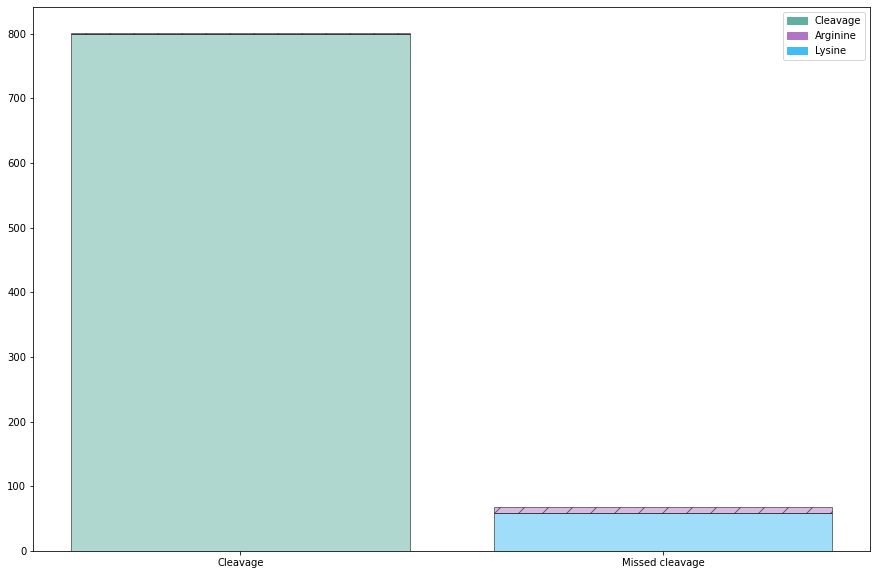

In [79]:
import matplotlib.patches as mpatches

x= ['Cleavage', 'Missed cleavage']
y= [len(Cleavage), len(Miss_cleavage)]
y1= [1,10]
plt.figure(figsize=(15, 10))
plt.bar(x, y, color=["#61afa1",'#42bcf5'], width=0.8, alpha=0.5, edgecolor='black', linewidth=1)
plt.bar(x, y1, color= "#b175c7", width=0.8, alpha=0.5, bottom=y, hatch='/', edgecolor='black', linewidth=1)

Cleavage1 = mpatches.Patch(color='#61afa1', label='Cleavage')
Lysine = mpatches.Patch(color='#b175c7', label='Arginine')
Arginine = mpatches.Patch(color='#42bcf5', label='Lysine')


plt.legend(handles= [Cleavage1, Lysine, Arginine])
plt.show()

In [80]:
df_miss_cleavage['Last_AA'].value_counts()

K    48
R    10
Name: Last_AA, dtype: int64

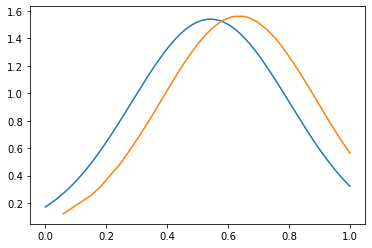

In [81]:
hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [82]:
from scipy.stats import ttest_ind

df1 = df[df['relative ASA'] != '']



cat1 = df1[df1['Cleavage']==0]
cat2 = df1[df1['Cleavage']==1]

ttest_ind(Cleavage, Miss_cleavage)

Ttest_indResult(statistic=-2.652585829989467, pvalue=0.008135679983482299)

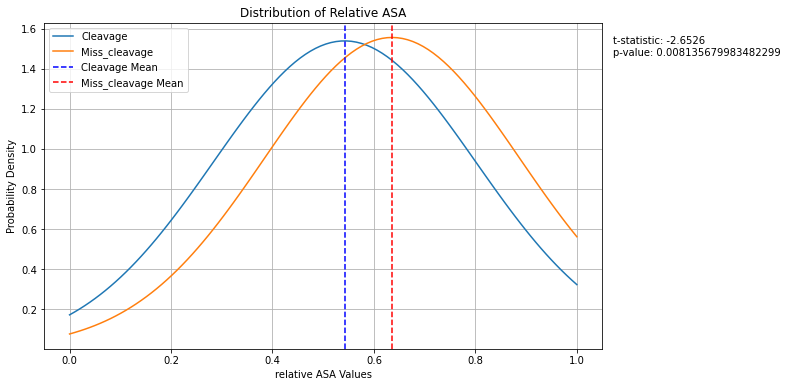

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind

# Perform independent t-test
t_statistic, p_value = ttest_ind(Cleavage, Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(Cleavage), min(Miss_cleavage)), max(max(Cleavage), max(Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(Cleavage)-1, loc=np.mean(Cleavage), scale=np.std(Cleavage))
pdf2 = t.pdf(x, df=len(Miss_cleavage)-1, loc=np.mean(Miss_cleavage), scale=np.std(Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot probability distribution graphs
plt.plot(x, pdf1, label='Cleavage')
plt.plot(x, pdf2, label='Miss_cleavage')


# Add mean thresholds
plt.axvline(np.mean(Cleavage), color='blue', linestyle='--', label='Cleavage Mean')
plt.axvline(np.mean(Miss_cleavage), color='red', linestyle='--', label='Miss_cleavage Mean')

# Set the y-limits to include the full gradient
#plt.ylim([0, max(max(pdf1), max(pdf2)) * 1.1])  # Adjust the multiplier (1.1) as needed

#Adding lables
plt.xlabel('relative ASA Values')
plt.ylabel('Probability Density')
plt.title('Distribution of Relative ASA')
plt.legend()
plt.grid(True)

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


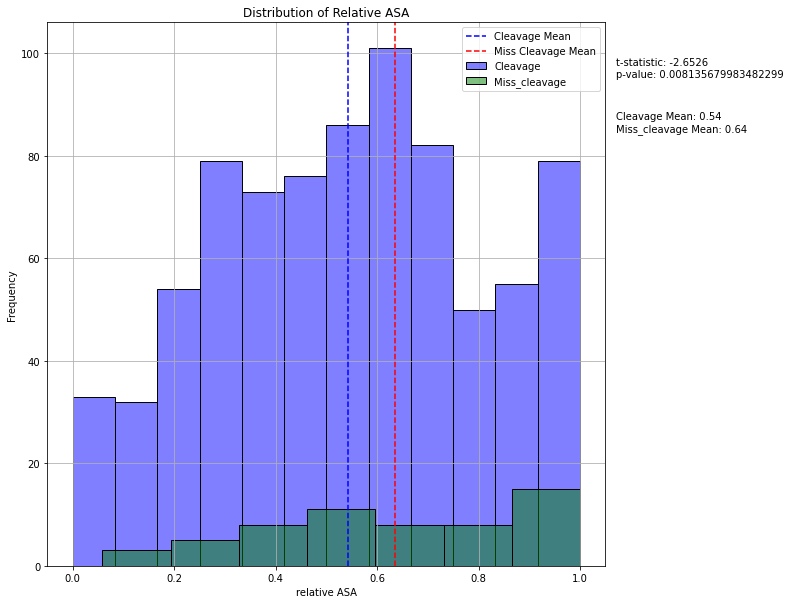

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import seaborn as sns

# Assuming you have already defined 'Cleavage' and 'Miss_cleavage' arrays

# Perform independent t-test
t_statistic, p_value = ttest_ind(Cleavage, Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(Cleavage), min(Miss_cleavage)), max(max(Cleavage), max(Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(Cleavage)-1, loc=np.mean(Cleavage), scale=np.std(Cleavage))
pdf2 = t.pdf(x, df=len(Miss_cleavage)-1, loc=np.mean(Miss_cleavage), scale=np.std(Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(Cleavage, color='blue', alpha=0.5, label='Cleavage')
sns.histplot(Miss_cleavage, color='green', alpha=0.5, label='Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(Cleavage), color='blue', linestyle='--', label='Cleavage Mean')
plt.axvline(np.mean(Miss_cleavage), color='red', linestyle='--', label='Miss Cleavage Mean')

# Adding labels
plt.xlabel('relative ASA')
plt.ylabel('Frequency')
plt.title('Distribution of Relative ASA')
plt.legend()
plt.grid(True)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"Cleavage Mean: {np.mean(Cleavage):.2f}\nMiss_cleavage Mean: {np.mean(Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [85]:
print(len(Cleavage))
print(len(Miss_cleavage))

800
58


In [86]:
from Bio.PDB.ResidueDepth import ResidueDepth
def Residue_Depth_and_SASA(df):
    "Prints Residue Depth and SASA calculation to the dataframe"
    PA.get_residue_depth_name(df)
    PA.add_values(df)
    PA.generating_sasa_columns(df)
    return df

In [87]:
df=Residue_Depth_and_SASA(df)
df

215
O95782
The file exists!
O95197
The file exists!
Q9Y2S7
The file exists!
Q9P258
The file exists!
Q02241
The file exists!
Q15149
The file exists!
P28065
The file exists!
Q9ULE0
The file exists!
P09417
The file exists!
P45877
The file exists!
P19387
The file exists!
P02771
The file exists!
Q9HD34
The file exists!
Q16527
The file exists!
Q9GZV5
The file exists!
Q9NVA2
The file exists!
Q96SY0
The file exists!
Q02318
The file exists!
P61956
The file exists!
Q7Z4W1
The file exists!
Q9BY41
The file exists!
P52298
The file exists!
Q9UFN0
The file exists!
P09132
The file exists!
Q14839
The file exists!
O60936
The file exists!
Q96HQ2
The file exists!
O43583
The file exists!
Q9NZU5
The file exists!
P51397
The file exists!
P23434
The file exists!
Q16539
The file exists!
Q9UBQ7
The file exists!
Q53EZ4
The file exists!
P55036
The file exists!
Q9HCD5
The file exists!
P28482
The file exists!
Q53F19
The file exists!
P01127
The file exists!
Q8NG11
The file exists!
P82912
The file exists!
Q92859
The f

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,H,S,T,Acetyl (Protein N-term),"Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth,SASA
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,-,...,0,0,0,1,0,0,0,1.806892,1.999532,259.30
1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0,T,...,0,0,1,1,0,0,0,1.806923,1.999417,176.54
2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0,-,...,0,0,0,1,0,0,0,2.098366,1.999790,68.60
3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0,-,...,0,0,0,1,0,0,0,1.827747,1.999773,163.67
4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0,-,...,0,0,0,0,0,0,1,1.806797,1.999559,240.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0,-,...,0,0,0,0,0,0,1,2.000987,2.301980,71.43
937,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0,H,...,1,0,0,0,0,0,1,2.114801,1.999757,73.98
938,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0,-,...,0,0,0,0,0,0,1,1.878462,1.999443,125.76
939,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0,H,...,1,0,0,0,0,0,1,2.302059,3.028384,53.79


In [88]:
df_sasa= df

In [89]:
df_sasa.to_csv('sasa_dataframe_Dataset2.csv') #Save the dataframe to a csv file

In [90]:
df = pd.read_csv('sasa_dataframe_Dataset2.csv')
df

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,H,S,T,Acetyl (Protein N-term),"Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth,SASA
0,0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,...,0,0,0,1,0,0,0,1.806892,1.999532,259.30
1,1,AAAAAAGAGPEMVR,P28482,Acetyl (Protein N-term),2,15,AAAAAAGAGPEMVR,R,15,0,...,0,0,1,1,0,0,0,1.806923,1.999417,176.54
2,2,AAAAAAGEAR,P09417,Acetyl (Protein N-term),2,11,AAAAAAGEAR,R,11,0,...,0,0,0,1,0,0,0,2.098366,1.999790,68.60
3,3,AAAAAGTATSQR,Q9Y2Z0,Acetyl (Protein N-term),2,13,AAAAAGTATSQR,R,13,0,...,0,0,0,1,0,0,0,1.827747,1.999773,163.67
4,4,AAAAAWEEPSSGNGTAR,Q9P258,Unmodified,6,22,AAAAAWEEPSSGNGTAR,R,22,0,...,0,0,0,0,0,0,1,1.806797,1.999559,240.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,936,YTQVGPDHNR,Q08211,Unmodified,200,209,YTQVGPDHNR,R,209,0,...,0,0,0,0,0,0,1,2.000987,2.301980,71.43
854,937,YVLINWVGEDVPDAR,Q16643,Unmodified,80,94,YVLINWVGEDVPDAR,R,94,0,...,1,0,0,0,0,0,1,2.114801,1.999757,73.98
855,938,YWCNDGK,P61626,Unmodified,81,87,YWCNDGK,K,87,0,...,0,0,0,0,0,0,1,1.878462,1.999443,125.76
856,939,YYGAQTVR,P07954,Unmodified,67,74,YYGAQTVR,R,74,0,...,1,0,0,0,0,0,1,2.302059,3.028384,53.79


In [91]:
df_cleavage_res_depth= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_res_depth= df.loc[df['Cleavage'] == 1]

In [92]:
res_depth_Cleavage= []
for a in df_cleavage_res_depth['res_depth']:
    res_depth_Cleavage.append(a)


b= sorted(res_depth_Cleavage)

res_depth_Miss_cleavage= []
for c in df_miss_cleavage_res_depth['res_depth']:
    res_depth_Miss_cleavage.append(c)


d= sorted(res_depth_Miss_cleavage)

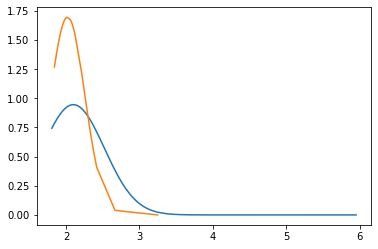

In [93]:
bmean = np.mean(b)
dmean = np.mean(d)

bstd = np.std(b)
dstf= np.std(d)

bpdf = stats.norm.pdf(b, bmean, bstd)
dpdf1 = stats.norm.pdf(d, dmean, dstf)

plt.plot(b, bpdf) 
plt.plot(d, dpdf1)

plt.show()

In [94]:
from scipy.stats import ttest_ind

df1 = df[df['res_depth'] != '']



res_depth_cat1 = df1[df1['Cleavage']==0]
res_depth_cat2 = df1[df1['Cleavage']==1]


ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

Ttest_indResult(statistic=1.395023554953307, pvalue=0.16337058171307517)

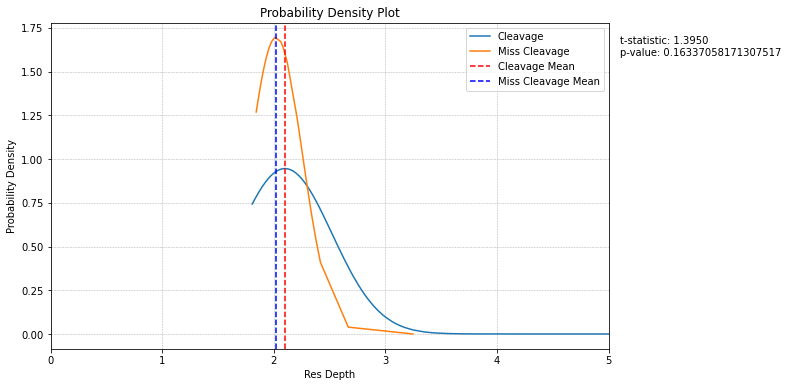

In [95]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

# Create lists from dataframes
res_depth_Cleavage = df_cleavage_res_depth['res_depth'].tolist()
res_depth_Miss_cleavage = df_miss_cleavage_res_depth['res_depth'].tolist()

# Sort the lists
res_depth_Cleavage.sort()
res_depth_Miss_cleavage.sort()

# Calculate mean and standard deviation
bmean = np.mean(res_depth_Cleavage)
dmean = np.mean(res_depth_Miss_cleavage)
bstd = np.std(res_depth_Cleavage)
dstf = np.std(res_depth_Miss_cleavage)

# Calculate probability density functions
bpdf = stats.norm.pdf(res_depth_Cleavage, bmean, bstd)
dpdf = stats.norm.pdf(res_depth_Miss_cleavage, dmean, dstf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(res_depth_Cleavage, bpdf, label='Cleavage')
plt.plot(res_depth_Miss_cleavage, dpdf, label='Miss Cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(bmean, color='r', linestyle='--', label='Cleavage Mean')
plt.axvline(dmean, color='b', linestyle='--', label='Miss Cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('Res Depth')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


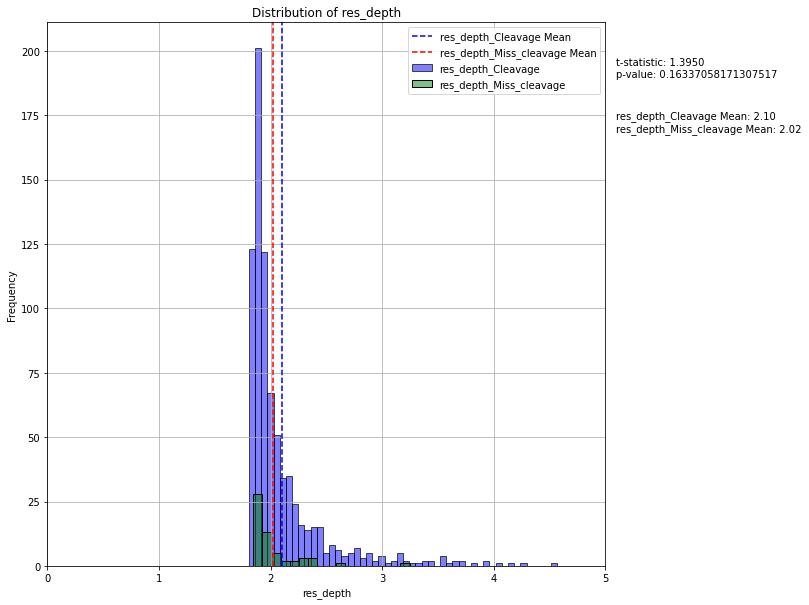

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import seaborn as sns

# Assuming you have already defined 'res_depth_Cleavage' and 'res_depth_Miss_cleavage' arrays

# Perform independent t-test
t_statistic, p_value = ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(res_depth_Cleavage), min(res_depth_Miss_cleavage)), max(max(res_depth_Cleavage), max(res_depth_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(res_depth_Cleavage)-1, loc=np.mean(res_depth_Cleavage), scale=np.std(res_depth_Cleavage))
pdf2 = t.pdf(x, df=len(res_depth_Miss_cleavage)-1, loc=np.mean(res_depth_Miss_cleavage), scale=np.std(res_depth_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(res_depth_Cleavage, color='blue', alpha=0.5, label='res_depth_Cleavage')
sns.histplot(res_depth_Miss_cleavage, color='green', alpha=0.5, label='res_depth_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(res_depth_Cleavage), color='blue', linestyle='--', label='res_depth_Cleavage Mean')
plt.axvline(np.mean(res_depth_Miss_cleavage), color='red', linestyle='--', label='res_depth_Miss_cleavage Mean')

# Adding labels
plt.xlabel('res_depth')
plt.ylabel('Frequency')
plt.title('Distribution of res_depth')
plt.legend()
plt.grid(True)

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"res_depth_Cleavage Mean: {np.mean(res_depth_Cleavage):.2f}\nres_depth_Miss_cleavage Mean: {np.mean(res_depth_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [97]:
df_cleavage_ca_depth= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_ca_depth= df.loc[df['Cleavage'] == 1]

In [98]:
ca_depth_Cleavage= []
for e in df_cleavage_ca_depth['ca_depth']:
    ca_depth_Cleavage.append(e)


f= sorted(ca_depth_Cleavage)

ca_depth_Miss_cleavage= []
for g in df_miss_cleavage_ca_depth['ca_depth']:
    ca_depth_Miss_cleavage.append(g)


I= sorted(ca_depth_Miss_cleavage)

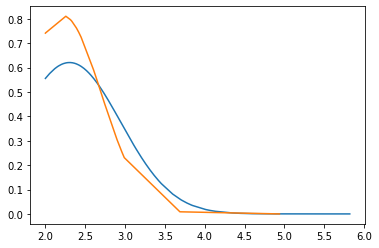

In [99]:
fmean = np.mean(f)
Imean = np.mean(I)

fstd = np.std(f)
Istf= np.std(I)

fpdf = stats.norm.pdf(f, fmean, fstd)
Ipdf1 = stats.norm.pdf(I, Imean, Istf)

plt.plot(f, fpdf) 
plt.plot(I, Ipdf1)

plt.show()

In [100]:
from scipy.stats import ttest_ind

df1 = df[df['ca_depth'] != '']



ca_depth_cat1 = df1[df1['Cleavage']==0]
ca_depth_cat2 = df1[df1['Cleavage']==1]


ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

Ttest_indResult(statistic=1.0514497759371566, pvalue=0.29334879554710996)

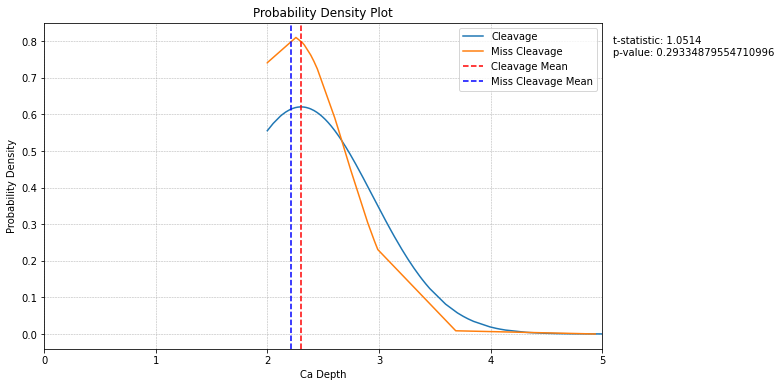

In [101]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

# Create lists from dataframes
ca_depth_Cleavage = df_cleavage_ca_depth['ca_depth'].tolist()
ca_depth_Miss_cleavage = df_miss_cleavage_ca_depth['ca_depth'].tolist()

# Sort the lists
ca_depth_Cleavage.sort()
ca_depth_Miss_cleavage.sort()


# Calculate probability density functions
bpdf = stats.norm.pdf(ca_depth_Cleavage, fmean, fstd)
dpdf = stats.norm.pdf(ca_depth_Miss_cleavage, Imean, Istf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(ca_depth_Cleavage, fpdf, label='Cleavage')
plt.plot(ca_depth_Miss_cleavage, Ipdf1, label='Miss Cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(fmean, color='r', linestyle='--', label='Cleavage Mean')
plt.axvline(Imean, color='b', linestyle='--', label='Miss Cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('Ca Depth')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)


# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

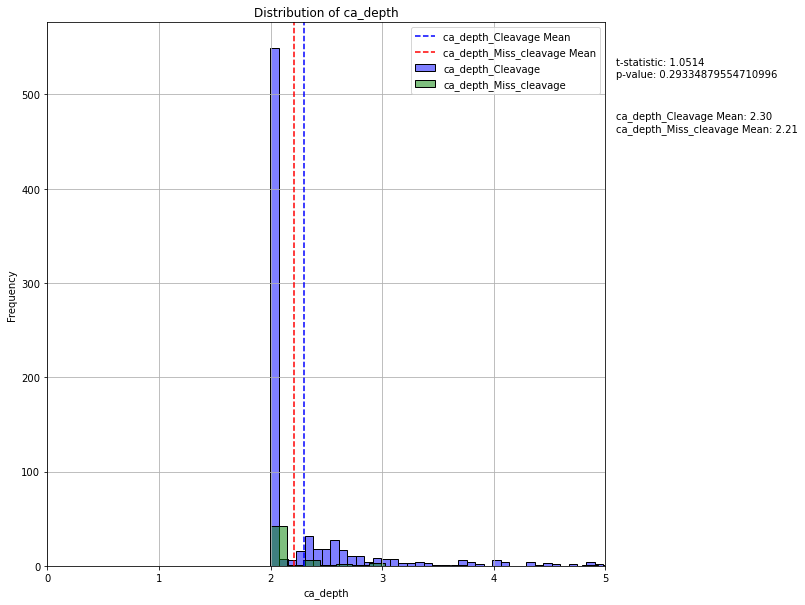

In [102]:

# Perform independent t-test
t_statistic, p_value = ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(ca_depth_Cleavage), min(ca_depth_Miss_cleavage)), max(max(ca_depth_Cleavage), max(ca_depth_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(ca_depth_Cleavage)-1, loc=np.mean(ca_depth_Cleavage), scale=np.std(ca_depth_Cleavage))
pdf2 = t.pdf(x, df=len(ca_depth_Miss_cleavage)-1, loc=np.mean(ca_depth_Miss_cleavage), scale=np.std(ca_depth_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(ca_depth_Cleavage, color='blue', alpha=0.5, label='ca_depth_Cleavage')
sns.histplot(ca_depth_Miss_cleavage, color='green', alpha=0.5, label='ca_depth_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(ca_depth_Cleavage), color='blue', linestyle='--', label='ca_depth_Cleavage Mean')
plt.axvline(np.mean(ca_depth_Miss_cleavage), color='red', linestyle='--', label='ca_depth_Miss_cleavage Mean')

# Adding labels
plt.xlabel('ca_depth')
plt.ylabel('Frequency')
plt.title('Distribution of ca_depth')
plt.legend()
plt.grid(True)

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)


# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"ca_depth_Cleavage Mean: {np.mean(ca_depth_Cleavage):.2f}\nca_depth_Miss_cleavage Mean: {np.mean(ca_depth_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [103]:
df_cleavage_SASA= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_SASA= df.loc[df['Cleavage'] == 1]

In [104]:
SASA_Cleavage= []
for j in df_cleavage_SASA['SASA']:
    SASA_Cleavage.append(j)


l= sorted(SASA_Cleavage)

SASA_Miss_cleavage= []
for m in df_miss_cleavage_SASA['SASA']:
    SASA_Miss_cleavage.append(m)


n= sorted(SASA_Miss_cleavage)

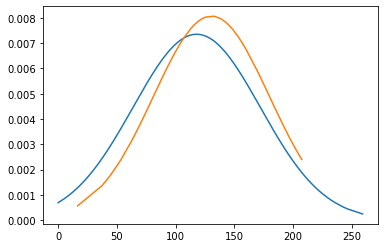

In [105]:
lmean = np.mean(l)
nmean = np.mean(n)

lstd = np.std(l)
nstf= np.std(n)

lpdf = stats.norm.pdf(l, lmean, lstd)
npdf1 = stats.norm.pdf(n, nmean, nstf)

plt.plot(l, lpdf) 
plt.plot(n, npdf1)

plt.show()

In [106]:
from scipy.stats import ttest_ind

df1 = df[df['SASA'] != '']



SASA_cat1 = df1[df1['Cleavage']==0]
SASA_cat2 = df1[df1['Cleavage']==1]


ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

Ttest_indResult(statistic=-1.710488821447668, pvalue=0.08753785770540977)

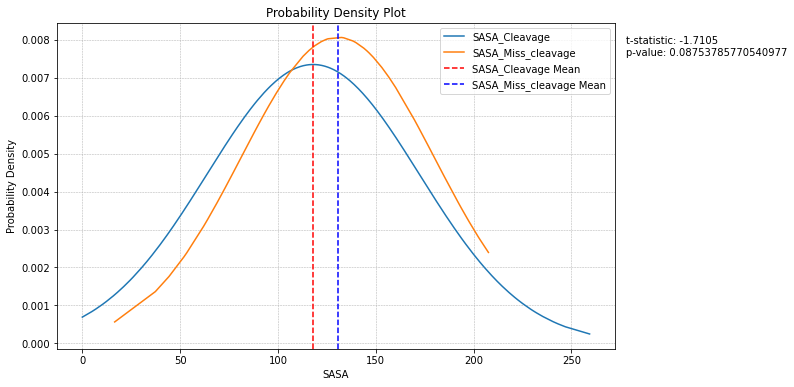

In [107]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

# Create lists from dataframes
SASA_Cleavage = df_cleavage_SASA['SASA'].tolist()
SASA_Miss_cleavage = df_miss_cleavage_SASA['SASA'].tolist()

# Sort the lists
SASA_Cleavage.sort()
SASA_Miss_cleavage.sort()


# Calculate probability density functions
bpdf = stats.norm.pdf(SASA_Cleavage, lmean, lstd)
dpdf = stats.norm.pdf(SASA_Miss_cleavage, nmean, nstf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(SASA_Cleavage, lpdf, label='SASA_Cleavage')
plt.plot(SASA_Miss_cleavage, npdf1, label='SASA_Miss_cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(lmean, color='r', linestyle='--', label='SASA_Cleavage Mean')
plt.axvline(nmean, color='b', linestyle='--', label='SASA_Miss_cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('SASA')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

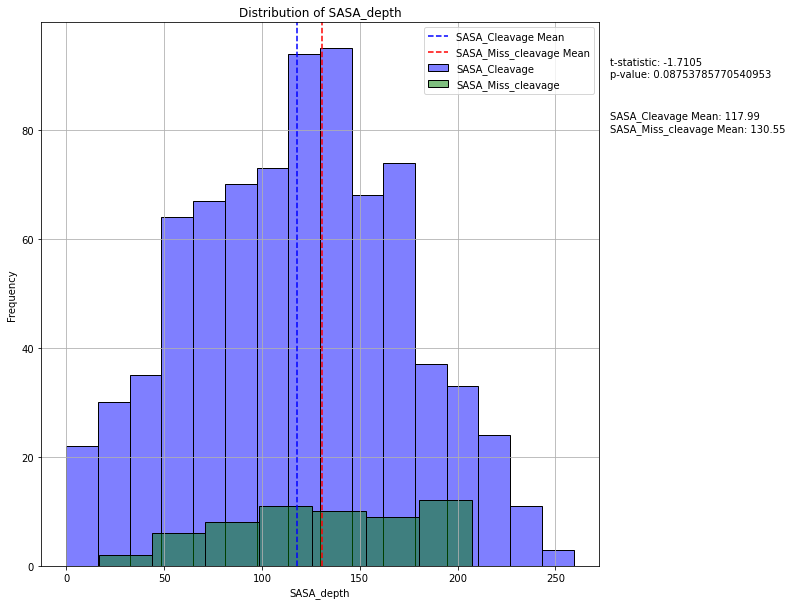

In [108]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(SASA_Cleavage), min(SASA_Miss_cleavage)), max(max(SASA_Cleavage), max(SASA_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(SASA_Cleavage)-1, loc=np.mean(SASA_Cleavage), scale=np.std(SASA_Cleavage))
pdf2 = t.pdf(x, df=len(SASA_Miss_cleavage)-1, loc=np.mean(SASA_Miss_cleavage), scale=np.std(SASA_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(SASA_Cleavage, color='blue', alpha=0.5, label='SASA_Cleavage')
sns.histplot(SASA_Miss_cleavage, color='green', alpha=0.5, label='SASA_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(SASA_Cleavage), color='blue', linestyle='--', label='SASA_Cleavage Mean')
plt.axvline(np.mean(SASA_Miss_cleavage), color='red', linestyle='--', label='SASA_Miss_cleavage Mean')

# Adding labels
plt.xlabel('SASA_depth')
plt.ylabel('Frequency')
plt.title('Distribution of SASA_depth')
plt.legend()
plt.grid(True)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"SASA_Cleavage Mean: {np.mean(SASA_Cleavage):.2f}\nSASA_Miss_cleavage Mean: {np.mean(SASA_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [109]:
#change cleavage values from 0 to 1 if the peptide has a duplicate that has cleavage value1
df['Cleavage']= df.duplicated(subset=[ 'ProteinID','cleavage_sites', 'LastAA_position'], keep=False) #keep=False to drop duplicates
df['Cleavage']= df['Cleavage'].astype(int) #convert to int

In [110]:

def check_duplicates(df, seq, elem_id, res_depth, Cleavage):
    
    different_groups = True if df[(df.cleavage_sites == seq) & (df.res_depth == res_depth) & (df.ProteinID == elem_id)]['Cleavage'].nunique() > 1 else False 
    sequence_dupls = True if len(df[df.cleavage_sites == seq]) > 1 else False
    id_dupls = True if len(df[df.ProteinID == elem_id]) > 1 else False
    res_depth_dupls = True if len(df[df.res_depth == res_depth]) > 1 else False
    
    if sequence_dupls and id_dupls and res_depth_dupls and different_groups:
        return 1 
    else:
        return Cleavage


df['Cleavage'] = df.apply(lambda row: check_duplicates(df, row.cleavage_sites, row.ProteinID, row.res_depth,row.Cleavage), axis=1)


# Machine learning #

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [112]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', 'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA'],
      dtype='object')


In [113]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

62

In [114]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=62)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [115]:
df_test.to_csv('df_test1_A2.csv', index=False)

In [116]:
df_test['Cleavage'].value_counts()

1    62
0    62
Name: Cleavage, dtype: int64

In [117]:
df_test

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,H,S,T,Acetyl (Protein N-term),"Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth,SASA
18,18,AAAPAPEEEMDECEQALAAEPK,P26641,Unmodified,254,275,AAAPAPEEEMDECEQALAAEPK,K,275,1,...,0,0,0,0,0,0,1,1.870745,2.000059,173.52
40,42,AAEEEDEADPK,P20962,Unmodified,82,92,AAEEEDEADPK,K,92,1,...,0,0,0,0,0,0,1,1.905988,1.999582,143.87
41,43,AAEEEDEADPKR,P20962,Unmodified,82,93,AAEEEDEADPK,K,92,1,...,0,0,0,0,0,0,1,1.905988,1.999582,143.87
52,55,AEGAATEEEGTPK,P80723,Unmodified,26,38,AEGAATEEEGTPK,K,38,1,...,0,0,0,0,0,0,1,1.870715,1.999338,170.22
54,58,AELRDDPIISTHLAK,O00231,Unmodified,311,325,DDPIISTHLAK,K,325,1,...,1,0,0,0,0,0,1,1.912654,1.999672,84.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,644,SANVNEFPVLK,P55060,Unmodified,471,481,SANVNEFPVLK,K,481,0,...,1,0,0,0,0,0,1,4.036248,4.864295,4.37
75,80,ALLGYADNQCK,Q9HC38,Unmodified,188,198,ALLGYADNQCK,K,198,0,...,0,0,0,0,0,0,1,2.772007,3.364848,21.12
449,491,NESSFASHK,Q96DB5,Unmodified,157,165,NESSFASHK,K,165,0,...,1,0,0,0,0,0,1,4.167509,5.820642,23.08
210,232,FLQEHGSDSFLAEHK,Q00688,Unmodified,28,42,FLQEHGSDSFLAEHK,K,42,0,...,0,0,1,0,0,0,1,1.959020,1.999371,169.18


In [118]:
missing_columns = df_test.columns[df_test.isna().any()].tolist()
print(missing_columns)

[]


In [119]:
column_name = 'SASA'  # Replace 'Column1' with your actual column name
df_test[column_name] = df_test[column_name].fillna(0)

In [120]:
df_test['SASA']

18     173.52
40     143.87
41     143.87
52     170.22
54      84.90
        ...  
575      4.37
75      21.12
449     23.08
210    169.18
151    185.00
Name: SASA, Length: 124, dtype: float64

In [121]:
x = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', 'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA']]
       
y = df_test['Cleavage']

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reshape x array
x_reshaped = x_scaled.reshape(-1, len(x.columns))

# Perform PCA
pca = PCA()
x_pca = pca.fit_transform(x_reshaped)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each principal component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

# You can also access the principal components themselves
principal_components = pca.components_

# Accessing the first two principal components (for visualization purposes, if desired)
pc1 = x_pca[:, 0]
pc2 = x_pca[:, 1]

Principal Component 1: 0.2501
Principal Component 2: 0.1124
Principal Component 3: 0.0930
Principal Component 4: 0.0811
Principal Component 5: 0.0721
Principal Component 6: 0.0704
Principal Component 7: 0.0576
Principal Component 8: 0.0506
Principal Component 9: 0.0420
Principal Component 10: 0.0330
Principal Component 11: 0.0285
Principal Component 12: 0.0262
Principal Component 13: 0.0233
Principal Component 14: 0.0186
Principal Component 15: 0.0137
Principal Component 16: 0.0120
Principal Component 17: 0.0101
Principal Component 18: 0.0023
Principal Component 19: 0.0022
Principal Component 20: 0.0007
Principal Component 21: 0.0000
Principal Component 22: 0.0000
Principal Component 23: 0.0000
Principal Component 24: 0.0000
Principal Component 25: 0.0000


1.0


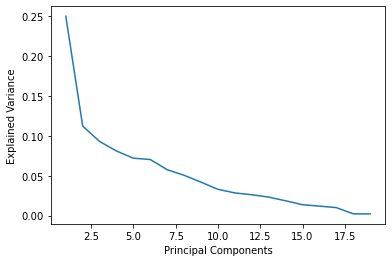

In [123]:
print(pca.explained_variance_ratio_.sum())
plt.plot(range(1, 20), pca.explained_variance_ratio_[:19])
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.show()
# observations:
#each PC captures less than the first, as expected.
#first 2 PCs capture 

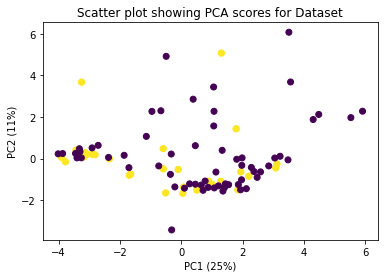

In [124]:
import matplotlib.pyplot as plt

# Replace sample_colours with your numerical variable for color mapping
sample_colours = df_test['Cleavage'].values

# Plotting the scatter plot using the first two principal components
plt.scatter(pc1, pc2, c=sample_colours, cmap='viridis')
plt.xlabel('PC1 (' + str(round(explained_variance[0] * 100)) + '%)')
plt.ylabel('PC2 (' + str(round(explained_variance[1] * 100)) + '%)')
plt.title('Scatter plot showing PCA scores for Dataset')

# Show the plot
plt.show()

In [125]:
len(df_test['Cleavage'])

124

In [126]:
# from sklearn.tree import plot_tree

# X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# clf = RandomForestClassifier(n_estimators=1000)
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)

In [127]:
from sklearn.tree import plot_tree

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [128]:
# from Bio.PDB.ResidueDepth import ResidueDepth
# from Bio.PDB.SASA import ShrakeRupley
# from sklearn.model_selection import train_test_split
# from sklearn.utils import resample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# # Define the random forest classifier
# clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# # Define the number of bootstrap iterations
# n_iterations = 100

# # Define a list to store the accuracy scores for each iteration
# scores = []

# # Perform bootstrap validation
# for i in range(n_iterations):
#     # Generate a bootstrap sample from the training data
#     X_train_boot, y_train_boot = resample(X_train, y_train, random_state=i)

#     # Train the random forest classifier on the bootstrap sample
#     clf.fit(X_train_boot, y_train_boot)
    
#     # Predict the classes of the testing data
#     y_pred = clf.predict(X_test)
    
#     # Compute the accuracy score on the testing data
#     score = accuracy_score(y_test, y_pred)
    
#     # Store the accuracy score for this iteration
#     scores.append(score)

# # Calculate the mean and standard deviation of the accuracy scores
# mean_score = np.mean(scores)
# std_score = np.std(scores)

# # Print the results
# print("Bootstrap validation results:")
# print("Mean accuracy score:", mean_score)
# print("Standard deviation of accuracy scores:", std_score)


Accuracy:  0.8387096774193549


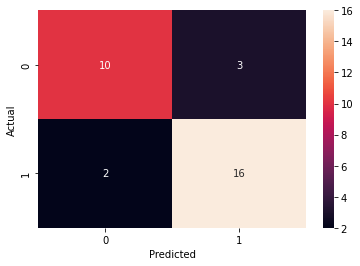

In [129]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy: 0.8387096774193549


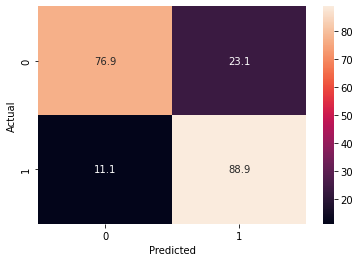

In [130]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Calculate row-wise percentages
row_sums = confusion_matrix.sum(axis=1)
confusion_matrix_percent = confusion_matrix.div(row_sums, axis=0) * 100

# Display the confusion matrix with percentages
sn.heatmap(confusion_matrix_percent, annot=True, fmt=".1f")  # Use ".1f" to display one decimal place

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
plt.show()

In [132]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

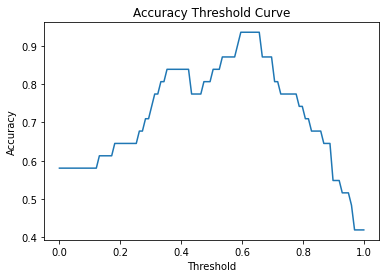

In [133]:
thresholds = np.linspace(0, 1, num=100)
accuracies = []
for threshold in thresholds:
    y_pred_threshold = (clf.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    accuracies.append(accuracy)

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

In [134]:
# Compute the confidence scores for the testing data
y_confidence = clf.predict_proba(X_test)
y_confidence = [probability[1] for probability in y_confidence]
y_confidence_formatted = ["{:.3f}".format(num) for num in y_confidence]

In [135]:
# Compare predictions with truth values
ProteinIDs=df['ProteinID'].tolist()
data_frame=pd.DataFrame({'relative ASA':X_test['relative ASA'] ,'Prediction':y_pred,'Probability':y_confidence_formatted})
merged_df = pd.merge(data_frame, df, on='relative ASA')
merged_df = merged_df[['ProteinID', 'start', 'end', 'cleavage_sites', 'Cleavage', 'Prediction','Probability']]
print(merged_df)

    ProteinID  start   end         cleavage_sites  Cleavage  Prediction  \
0      Q16643    229   236               EQQIEEHR         1           1   
1      Q16643    229   237               EQQIEEHR         1           1   
2      Q16643    227   236               EQQIEEHR         1           1   
3      Q15057    149   163        QHEVEEATNILTATR         0           1   
4      Q16643    229   236               EQQIEEHR         1           1   
..        ...    ...   ...                    ...       ...         ...   
136    P55060     32    52  FLESVEGNQNYPLLLLTLLEK         0           0   
137    Q9Y2Z0    351   363           VEINPPDDMEWK         0           0   
138    Q15149    751   764         SLESLHSFVAAATK         0           0   
139    Q8TF72   1242  1250               SSPATADK         0           0   
140    P13500     82    92            WVQDSMDHLDK         0           0   

    Probability  
0         0.699  
1         0.699  
2         0.699  
3         0.699  
4        

In [136]:
# select rows where the value in Prediction is equal to 1
df_ones = merged_df[merged_df['Prediction'] == 1]

# sort the resulting dataframe by the values in Probability in ascending order
df_ones_sorted = df_ones.sort_values('Probability', ascending=True)

# select the first row with the lowest Probability
result = df_ones_sorted.iloc[0]
threshold=result['Probability']
print(threshold)

0.535


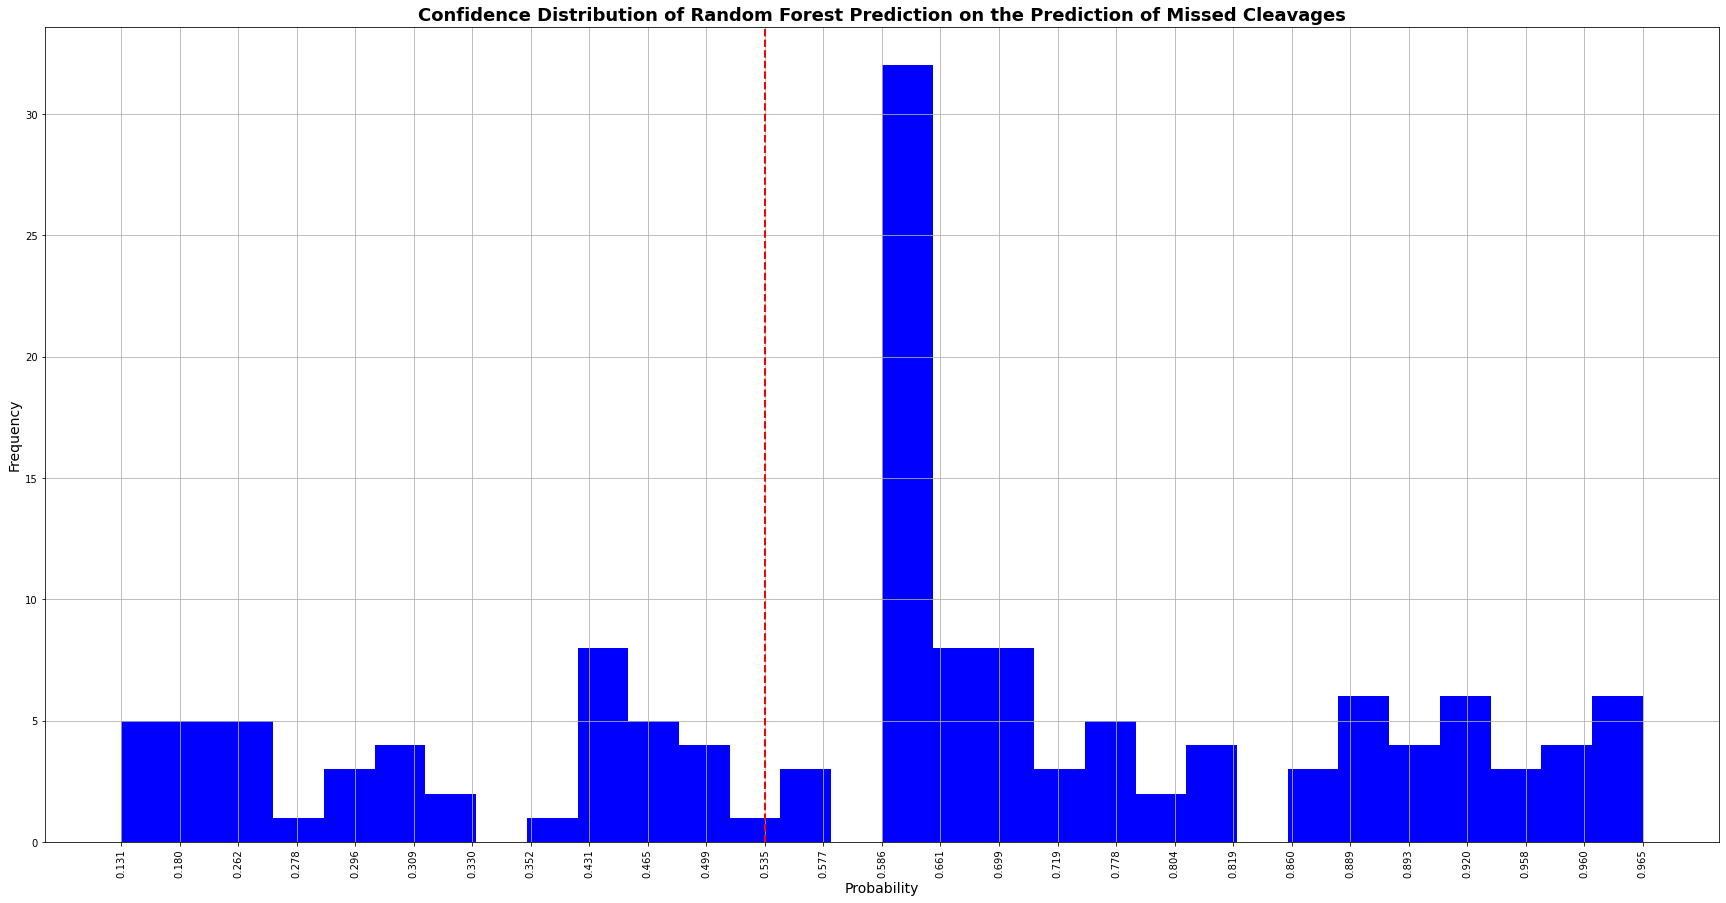

In [137]:
# Sort the Order_df dataframe by the 'end' column
Order_df = merged_df.sort_values('Probability')


# Create a figure and an axis object for the plot
fig, ax1 = plt.subplots(figsize=(30, 15))

# Add a histogram to the axis object
ax1.hist(Order_df['Probability'], bins=30, color='blue')
ax1.set_xlabel('Probability', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.title('Confidence Distribution of Random Forest Prediction on the Prediction of Missed Cleavages', fontsize=18, fontweight='bold')

# Customize the appearance of the plot
ax1.set_ylim(0)  # Set the y-axis limits for the first axis

# Add a vertical line at the threshold value
#threshold = 0.5
ax1.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# rotate x-axis label
plt.xticks(rotation=90)

# Add grid
plt.grid(True)

# Display plot
plt.show()

In [138]:
# Set the threshold value
threshold = input('Input threshold:')

# Filter the dataframe based on the threshold value
filtered_df = merged_df[merged_df['Probability'] > threshold]

# Print the filtered dataframe
print(filtered_df)

Input threshold: 0.535


    ProteinID  start  end    cleavage_sites  Cleavage  Prediction Probability
0      Q16643    229  236          EQQIEEHR         1           1       0.699
1      Q16643    229  237          EQQIEEHR         1           1       0.699
2      Q16643    227  236          EQQIEEHR         1           1       0.699
3      Q15057    149  163   QHEVEEATNILTATR         0           1       0.699
4      Q16643    229  236          EQQIEEHR         1           1       0.699
..        ...    ...  ...               ...       ...         ...         ...
130    O43583    182  198  WPEVDDDSIEDLGEVK         1           1       0.920
131    Q13033    137  147       YGTELNQGDLK         0           1       0.920
132    P55060    727  736        IPGLLGVFQK         0           1       0.719
133    P55060     76   83          IVEDEPNK         1           1       0.719
134    P55060     76   89          IVEDEPNK         1           1       0.719

[97 rows x 7 columns]


In [139]:
import shap

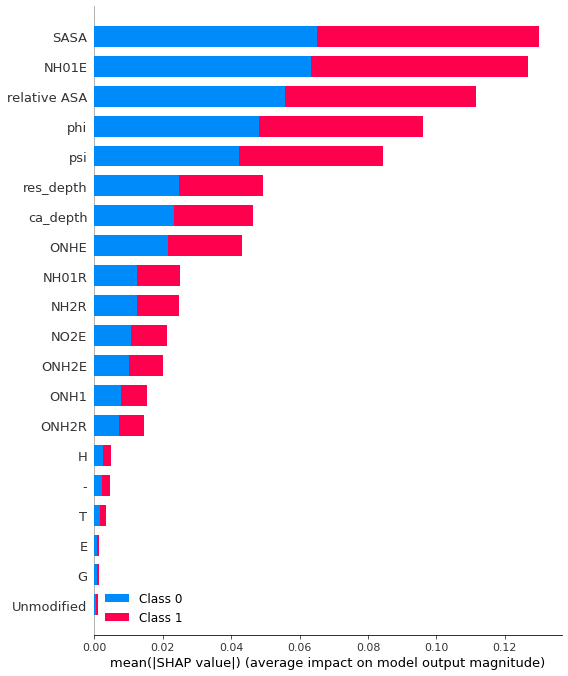

In [140]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.show()

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.84      0.89      0.86        18

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.83        31
weighted avg       0.84      0.84      0.84        31



# XG Boost #

In [142]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', 'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA'],
      dtype='object')


In [143]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

62

In [145]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=62)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [146]:
df_test.to_csv('df_xgboostDataset2.csv', index=False)

In [147]:
df_test['Cleavage'].value_counts()

1    62
0    62
Name: Cleavage, dtype: int64

In [148]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Loading preprocessed  data

X = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', 'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA']]  # Features
y = df_test['Cleavage']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Define the XGBoost model
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9032258064516129


Accuracy:  0.9032258064516129


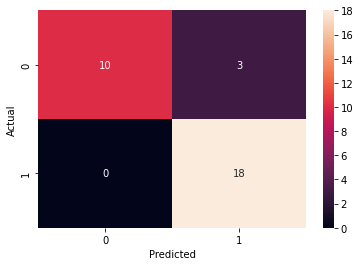

In [149]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

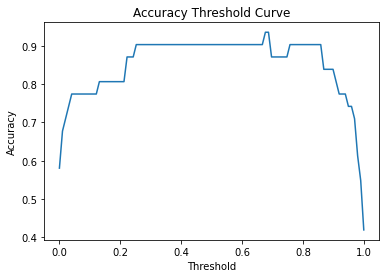

In [150]:
# Evaluate the best model on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create the accuracy threshold curve
thresholds = np.linspace(0, 1, 100)  # Vary the threshold from 0 to 1
accuracies = []  # Store the accuracies for each threshold

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold to the predicted probabilities
    accuracy = accuracy_score(y_test, y_pred_threshold)  # Compute accuracy
    accuracies.append(accuracy)

# Plot the accuracy threshold curve
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


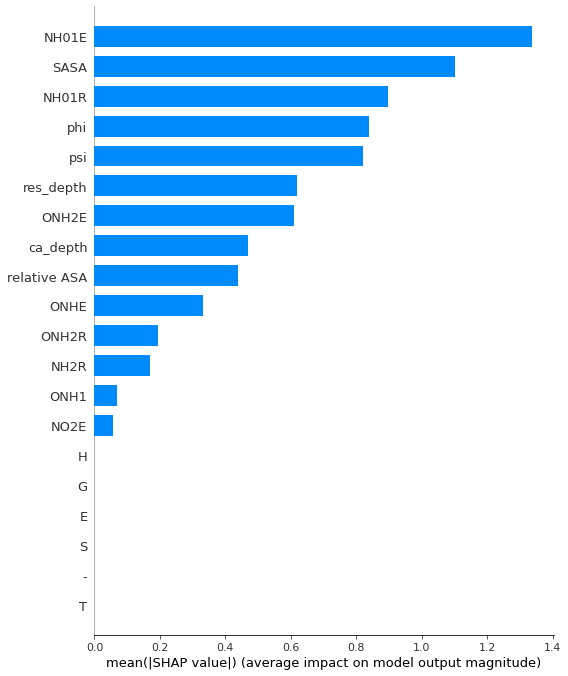

In [151]:
# Generate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot detailed feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

In [152]:
#optimizing hyperpatameters

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter values and the corresponding model
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9032258064516129


Accuracy:  0.9032258064516129


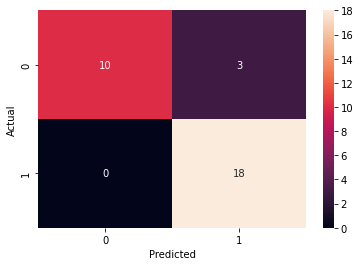

In [153]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

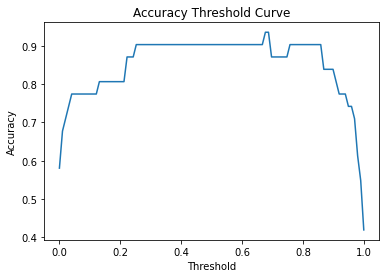

In [154]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create the accuracy threshold curve
thresholds = np.linspace(0, 1, 100)  # Vary the threshold from 0 to 1
accuracies = []  # Store the accuracies for each threshold

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold to the predicted probabilities
    accuracy = accuracy_score(y_test, y_pred_threshold)  # Compute accuracy
    accuracies.append(accuracy)

# Plot the accuracy threshold curve
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

In [155]:
# Get the confidence scores
confidence_scores = best_model.predict_proba(X_test)

# Select the confidence scores for the positive class
positive_scores = confidence_scores[:, 1]


In [156]:
# Compare predictions with truth values
ProteinIDs=df['ProteinID'].tolist()
data_frame=pd.DataFrame({'relative ASA':X_test['relative ASA'] ,'Prediction':y_pred,'Probability':positive_scores})
merged_df = pd.merge(data_frame, df, on='relative ASA')
merged_df = merged_df[['ProteinID', 'start', 'end', 'cleavage_sites', 'Cleavage', 'Prediction','Probability']]
print(merged_df)

    ProteinID  start  end   cleavage_sites  Cleavage  Prediction  Probability
0      Q16643    229  236         EQQIEEHR         1           1     0.861309
1      Q16643    229  237         EQQIEEHR         1           1     0.861309
2      Q16643    227  236         EQQIEEHR         1           1     0.861309
3      Q15057    149  163  QHEVEEATNILTATR         0           1     0.861309
4      Q16643    229  236         EQQIEEHR         1           1     0.861309
..        ...    ...  ...              ...       ...         ...          ...
112    P52298    113  120         TDWDAGFK         0           0     0.001558
113    O00231    176  185       TYHALSNLPK         0           0     0.001558
114    P55263     48   61   YSLKPNDQILAEDK         0           0     0.001558
115    P51693    372  379         LVETHATR         0           0     0.028877
116    P61626     69   80     STDYGIFQINSR         0           0     0.028877

[117 rows x 7 columns]


In [157]:
# select rows where the value in Prediction is equal to 1
df_ones = merged_df[merged_df['Prediction'] == 1]

# sort the resulting dataframe by the values in Probability in ascending order
df_ones_sorted = df_ones.sort_values('Probability', ascending=True)

# select the first row with the lowest Probability
result = df_ones_sorted.iloc[0]
threshold=result['Probability']
print(threshold)

0.66676414


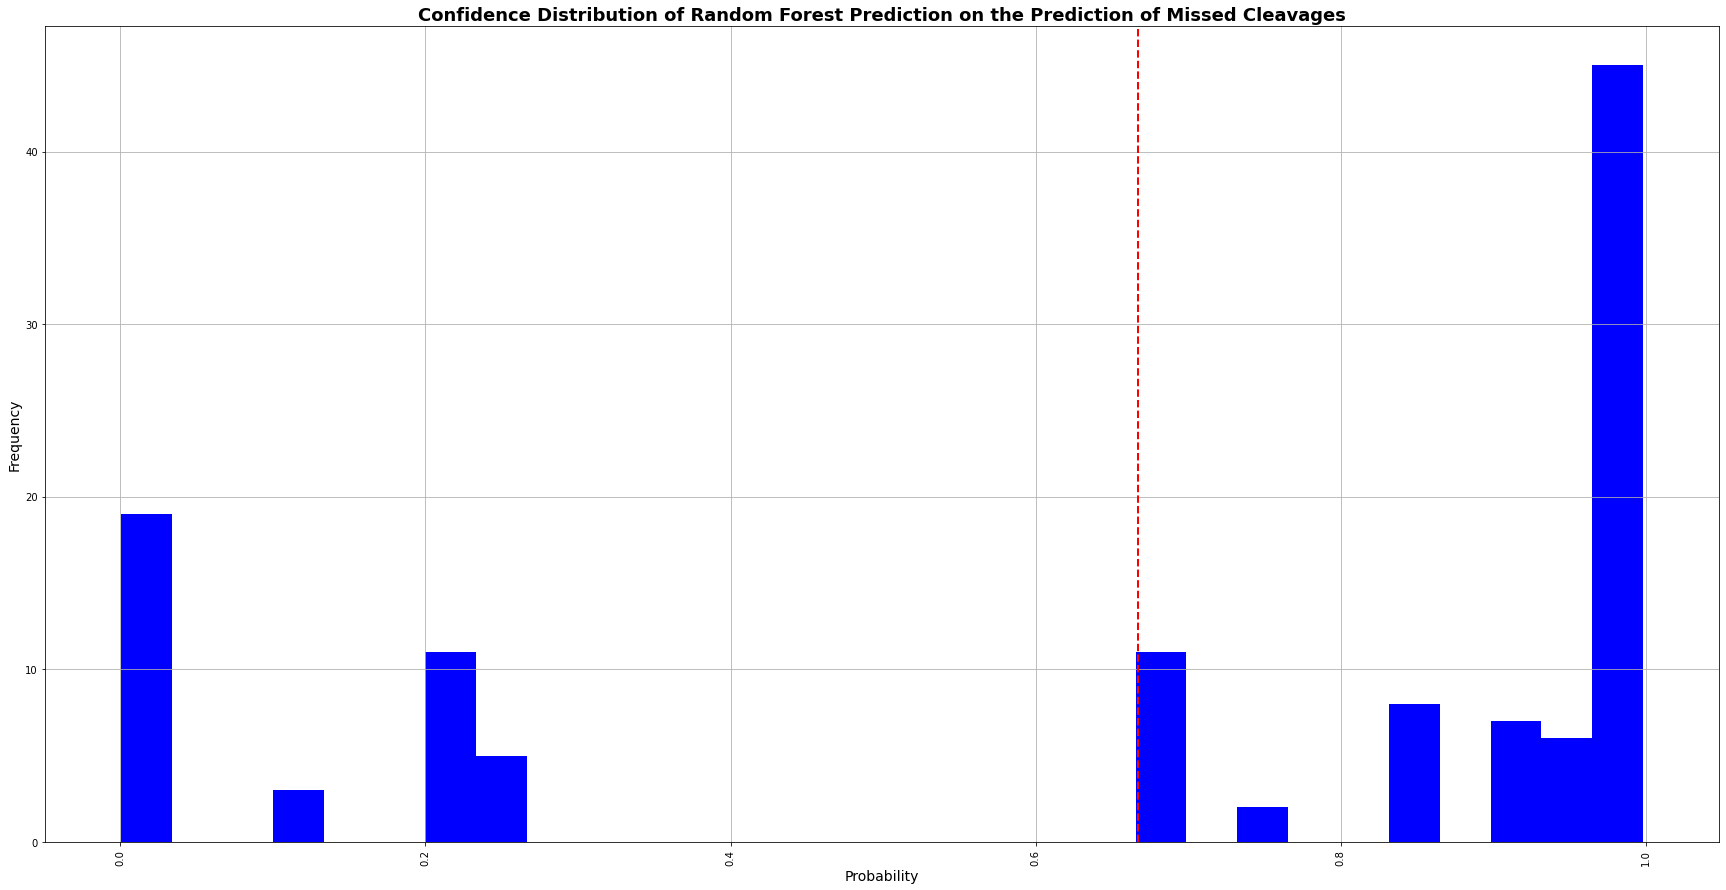

In [158]:
# Sort the Order_df dataframe by the 'end' column
Order_df = merged_df.sort_values('Probability')


# Create a figure and an axis object for the plot
fig, ax1 = plt.subplots(figsize=(30, 15))

# Add a histogram to the axis object
ax1.hist(Order_df['Probability'], bins=30, color='blue')
ax1.set_xlabel('Probability', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.title('Confidence Distribution of Random Forest Prediction on the Prediction of Missed Cleavages', fontsize=18, fontweight='bold')

# Customize the appearance of the plot
ax1.set_ylim(0)  # Set the y-axis limits for the first axis

# Add a vertical line at the threshold value
#threshold = 0.5
ax1.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# rotate x-axis label
plt.xticks(rotation=90)

# Add grid
plt.grid(True)

# Display plot
plt.show()

In [159]:
# Set the threshold value
threshold = float(input('Input threshold:'))

# Filter the dataframe based on the threshold value
filtered_df = merged_df[merged_df['Probability'] > threshold]

# Print the filtered dataframe
print(filtered_df)

Input threshold: 0.66676414


    ProteinID  start  end    cleavage_sites  Cleavage  Prediction  Probability
0      Q16643    229  236          EQQIEEHR         1           1     0.861309
1      Q16643    229  237          EQQIEEHR         1           1     0.861309
2      Q16643    227  236          EQQIEEHR         1           1     0.861309
3      Q15057    149  163   QHEVEEATNILTATR         0           1     0.861309
4      Q16643    229  236          EQQIEEHR         1           1     0.861309
..        ...    ...  ...               ...       ...         ...          ...
106    O43583    182  198  WPEVDDDSIEDLGEVK         1           1     0.946398
107    Q13033    137  147       YGTELNQGDLK         0           1     0.946398
108    P55060    727  736        IPGLLGVFQK         0           1     0.973122
109    P55060     76   83          IVEDEPNK         1           1     0.973122
110    P55060     76   89          IVEDEPNK         1           1     0.973122

[76 rows x 7 columns]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


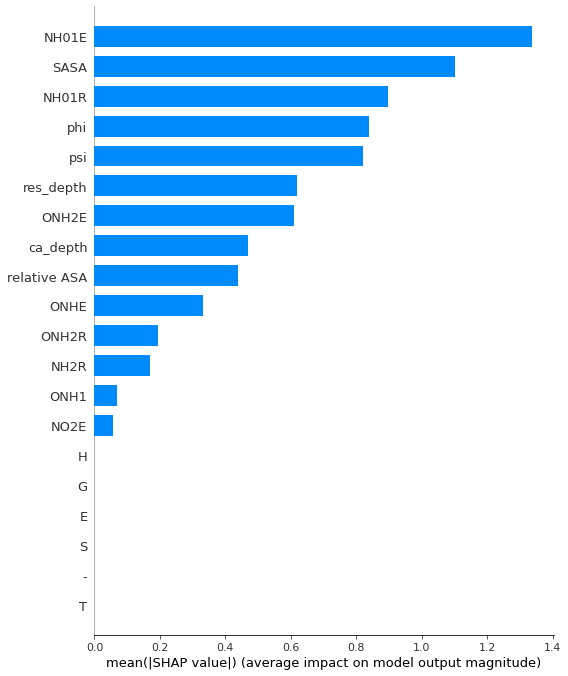

In [160]:
# Generate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plot detailed feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()